# Diabetes Exploratory Data Analysis (EDA) and Prediction

**Overview**: This capstone project is centered around analyzing medical data related to diabetes and creating predictive models to forecast a person's diabetes status. The project includes exploratory data analysis (EDA), observations, and the development of various models to accurately predict the presence or absence of diabetes.  



### Content and dataset

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a cleaned csv of the dataset available on Kaggle for the year 2015 was used [link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). 
This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses. The original data set is available on CDC page [link](https://www.cdc.gov/brfss/annual_data/annual_2015.html)


This dataset, diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables


### 1. Understanding the Data - Exploratory Data Analysis (EDA)


#### Import Libraries and Read in the Data

Use pandas to read in the dataset `diabetes_012_health_indicators_BRFSS2015.csv` and assign to a meaningful variable name.

In [91]:
# ***********This is a Python 3 environment*********

#!pip3 install xgboost 
#!pip3 install np_utils
#!pip install --upgrade scikit-learn
#!pip install --upgrade imblearn

import pandas as pd
import numpy as np
from pandas import read_csv
import time

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go # visualization
import plotly.offline as py # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from imblearn.combine import SMOTEENN

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import set_config
set_config(display="diagram")

from warnings import filterwarnings
filterwarnings('ignore')


#Imports to support Neural Networks
#!pip install --ignore-installed --upgrade tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam



In [92]:
# Load the dataset
df_raw = pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')
df_raw.head(5)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [93]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [94]:
# Data over view of the diabetes dataset

def dataoveriew(df, message, disp_val):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
    # for each column
    if disp_val == "y":
        for a in list(df.columns):
            # get a list of unique values
            n = df[a].unique()
            # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
            if len(n)<30:
                print(a)
                print(n)
            else:
                print(a + ': ' +str(len(n)) + ' unique values')

In [95]:
dataoveriew(df_raw, 'Overiew of the raw full dataset','y')


Overiew of the raw full dataset:

Rows: 253680

Number of features: 22

Features:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Missing values: 0

Unique values:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

#### Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

```
Input variables:
# Diabetes data:

**Diabetes_012** : you have diabetes (0,1,2) - target feature

0 = Not diabetic
1 = Pre diabetic
2 = diabetic


**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)
**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)
**CholCheck** : Cholesterol check within past five years (0,1)
**BMI** : Body Mass Index (BMI)
**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)
**Stroke** : (Ever told) you had a stroke. (0,1)
**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)
**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)
**Fruits** : Consume Fruit 1 or more times per day (0,1)
**Veggies** : Consume Vegetables 1 or more times per day (0,1)
**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)
**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)
**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)
**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)
**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)
**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)
**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)
**Sex** : Indicate sex of respondent (0,1) (Female or Male)
**Age** : Fourteen-level age category (1 ~ 14)
**Education** : What is the highest grade or year of school you completed? (1 ~ 6)
**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)
```

#### Examin and clean the data - check missed or and duplicate data

##### There are no missing values in this dataset. dropping duplicate data



In [96]:
# Remove duplicate records

#Checking for duplicated rows
print("Duplicate rows:", df_raw.duplicated().sum())

df_raw.drop_duplicates(inplace=True)

#overview of the data

dataoveriew(df_raw, 'Overiew of the raw dataset after removal of duplicate records','n')

Duplicate rows: 23899
Overiew of the raw dataset after removal of duplicate records:

Rows: 229781

Number of features: 22

Features:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Missing values: 0

Unique values:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education     

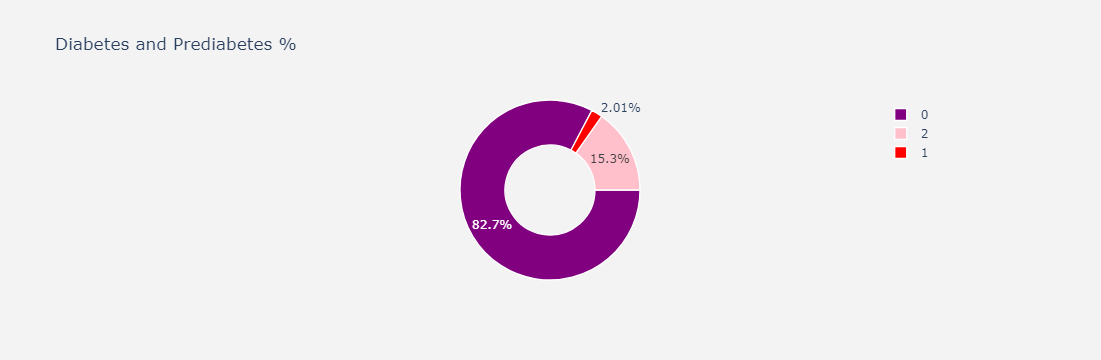

In [97]:
# Data Exploration and verify if data is balanced

trace = go.Pie(labels = df_raw["Diabetes_012"].value_counts().keys().tolist(),
               values = df_raw["Diabetes_012"].value_counts().values.tolist(),
               marker = dict(colors = ['purple', 'pink','red'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Diabetes and Prediabetes %",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

##### This dataset has imbalanced with only 17.3% population has diabetes (15.3%) or prediabetes (2. 01%) condition and rest of the 82.7% population is with no diabetes condition.



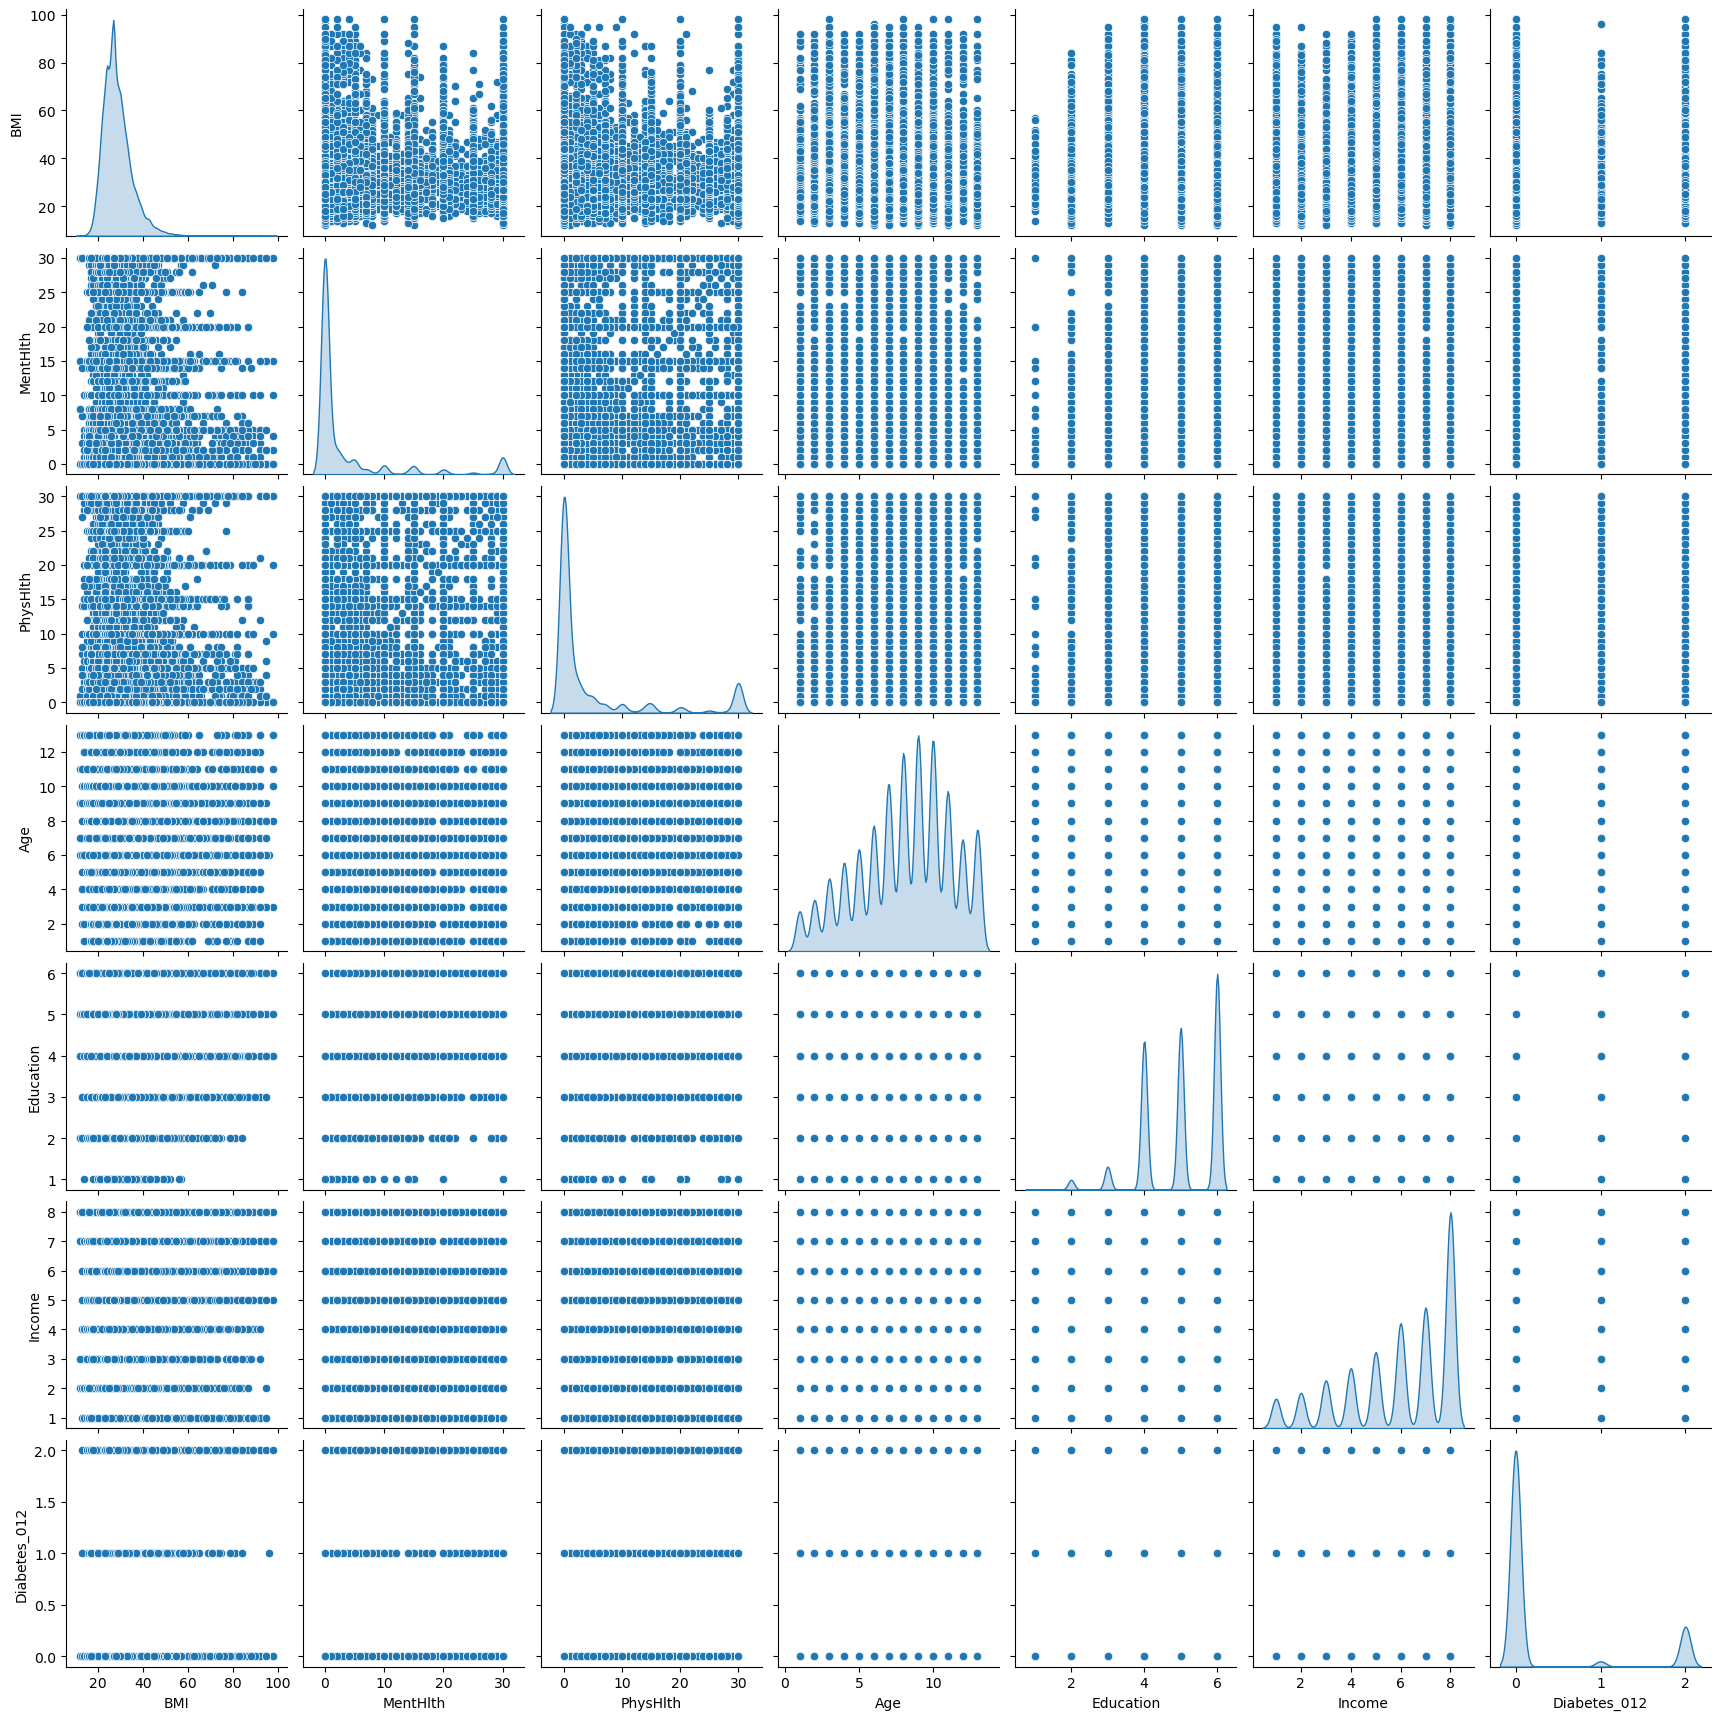

In [98]:
#Analyse data

#Separating columns to be visualized
out_cols = list(set(df_raw.nunique()[df_raw.nunique()<6].keys().tolist()
                    + df_raw.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in df_raw.columns if x not in out_cols] + ['Diabetes_012']
#sns.set_palette('summer_r')
sns.pairplot(df_raw[viz_cols], diag_kind="kde")
plt.show()

In [99]:
#Describe the numeric columns 

df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


[Text(0.5, 1.0, 'Box plot of BMI')]

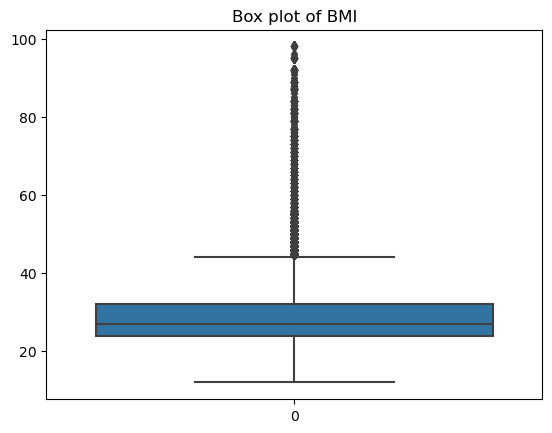

In [100]:
#check distribution of BMI

sns.boxplot(df_raw['BMI']).set(title='Box plot of BMI') 

In [101]:
# Remove outliers of BMI

percentile25 = df_raw['BMI'].quantile(0.25)
percentile75 = df_raw['BMI'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 2.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df_raw[df_raw['BMI'] > upper_limit]
df_raw[df_raw['BMI'] < lower_limit]

#clean dataset by removing BMI outliers - remove records with BMI > 52

df_raw = df_raw[df_raw['BMI'] < upper_limit]
df_raw.shape

(227859, 22)

[Text(0.5, 1.0, 'Box plot of BMI')]

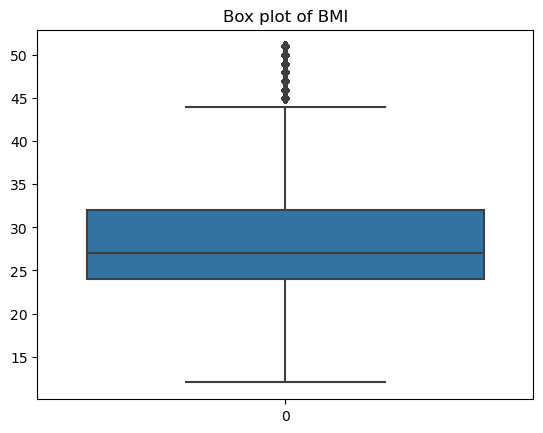

In [102]:
#check distribution of BMI after removing outliers

sns.boxplot(df_raw['BMI']).set(title='Box plot of BMI') 

Text(0.5, 1.0, 'High Blood Pressure(BP) correlation to the Diabetes')

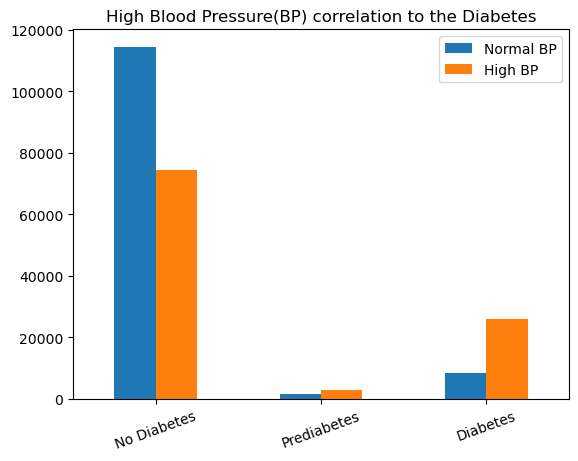

In [103]:
# visualize HighBP correlation to the diabetes
#sns.countplot(x='Diabetes_012', hue='HighBP', data=df_raw)
hbp= pd.crosstab(df_raw.Diabetes_012, df_raw.HighBP)
ax = hbp.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No Diabetes', 'Prediabetes','Diabetes'], rotation=20)
ax.legend(['Normal BP', 'High BP'])
plt.title('High Blood Pressure(BP) correlation to the Diabetes')

(15.0, 50.0)

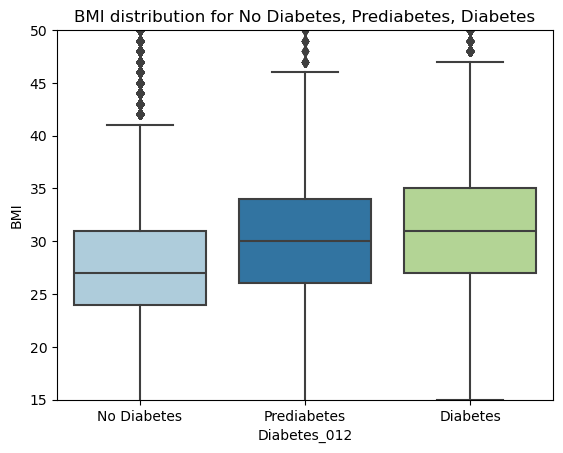

In [104]:
# visualize BMI correlation to the diabetes
ax = sns.boxplot(data=df_raw, x='Diabetes_012', y='BMI', palette='Paired')
ax.set(title = 'BMI distribution for No Diabetes, Prediabetes, Diabetes')
ax.set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.ylim(15, 50)

Text(0.5, 1.0, 'High Cholestrol correlation to the Diabetes')

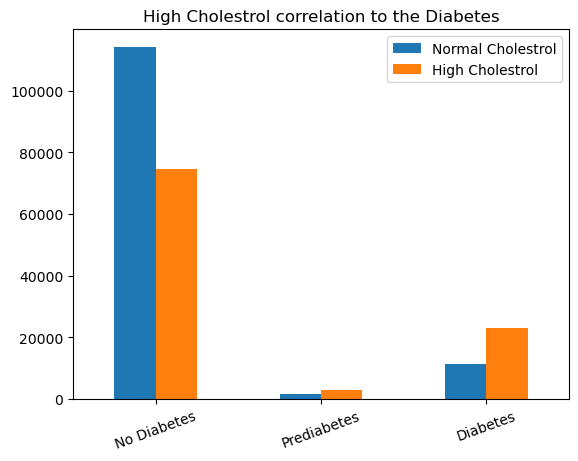

In [105]:
# visualize High Cholestrol correlation to the diabetes
#sns.countplot(x='Diabetes_012', hue='HighChol', data=df_raw)
hchl= pd.crosstab(df_raw.Diabetes_012, df_raw.HighChol)
ax = hchl.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No Diabetes', 'Prediabetes','Diabetes'], rotation=20)
ax.legend(['Normal Cholestrol', 'High Cholestrol'])
plt.title('High Cholestrol correlation to the Diabetes')

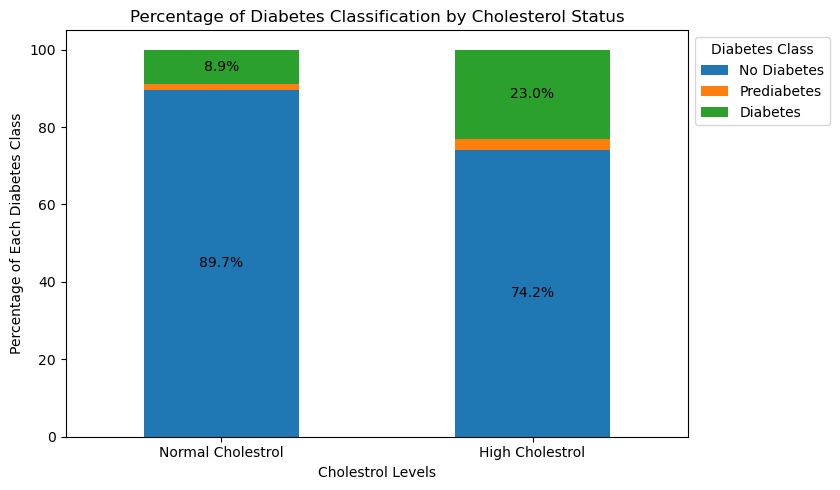

In [106]:
# Plot Percentage of Diabetes Classification by Cholesterol

diabetes_percentages = df_raw.groupby(['HighChol', 'Diabetes_012']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack()
# Create a bar plot
ax = diabetes_percentages.plot(kind='bar', stacked=True, figsize=(10, 5))

# Adding the percentage text on the bars
for c in ax.containers:
    # Optional: if the segment is too small, don't place a label
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# Adding titles and labels
plt.title('Percentage of Diabetes Classification by Cholesterol Status')
plt.xlabel('Cholestrol Levels')
plt.ylabel('Percentage of Each Diabetes Class')
plt.xticks(ticks=[0, 1], labels=['Normal Cholestrol', 'High Cholestrol'], rotation=0)

# Move the legend to the right top and outside of the plot area
plt.legend(title='Diabetes Class', labels=['No Diabetes', 'Prediabetes', 'Diabetes'], loc='upper left', bbox_to_anchor=(1,1))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust the rect to make space for the legend

# Show plot with the adjusted legend
plt.show()

In [107]:
df_raw.cov()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,0.521354,0.093634,0.072788,0.010748,0.974434,0.016998,0.014999,0.037577,-0.031951,-0.008685,...,0.004119,0.004733,0.216550,0.304506,1.017615,0.057657,0.012082,0.416396,-0.076266,-0.218505
HighBP,0.093634,0.247805,0.070373,0.010911,0.628069,0.018619,0.012822,0.030466,-0.022408,-0.004528,...,0.005872,0.000208,0.142994,0.134207,0.635777,0.040161,0.011890,0.526061,-0.055161,-0.143285
HighChol,0.072788,0.070373,0.246606,0.009298,0.305542,0.018424,0.009180,0.026648,-0.013690,-0.006367,...,0.005904,0.000397,0.099236,0.189256,0.492436,0.026048,0.005707,0.405781,-0.024271,-0.063689
CholCheck,0.010748,0.010911,0.009298,0.038899,0.054446,-0.000360,0.001142,0.003013,-0.000357,0.001735,...,0.005151,-0.003120,0.013214,-0.003463,0.071784,0.003716,-0.002360,0.058775,-0.001901,0.000944
BMI,0.974434,0.628069,0.305542,0.054446,34.768154,-0.014403,0.015243,0.082389,-0.335666,-0.201719,...,-0.005918,0.077919,1.357688,2.913999,5.120971,0.410276,0.124219,-0.681101,-0.472778,-0.788663
Smoker,0.016998,0.018619,0.018424,-0.000360,-0.014403,0.248854,0.005605,0.016001,-0.014886,-0.015061,...,-0.001607,0.005465,0.072088,0.297751,0.453728,0.021043,0.023944,0.166196,-0.067415,-0.099945
Stroke,0.014999,0.012822,0.009180,0.001142,0.015243,0.005605,0.042721,0.012513,-0.005395,-0.000459,...,0.000629,0.001699,0.037327,0.098618,0.262384,0.013566,0.000387,0.081996,-0.013126,-0.050535
HeartDiseaseorAttack,0.037577,0.030466,0.026648,0.003013,0.082389,0.016001,0.012513,0.092484,-0.009753,-0.001050,...,0.001792,0.001916,0.079648,0.121757,0.465523,0.023859,0.013634,0.210915,-0.024831,-0.077619
PhysActivity,-0.031951,-0.022408,-0.013690,-0.000357,-0.335666,-0.014886,-0.005395,-0.009753,0.194742,0.026776,...,0.002396,-0.005812,-0.110129,-0.352041,-0.780929,-0.039634,0.007162,-0.120605,0.074958,0.151440
Fruits,-0.008685,-0.004528,-0.006367,0.001735,-0.201719,-0.015061,-0.000459,-0.001050,0.026776,0.237075,...,0.002502,-0.004566,-0.036520,-0.193576,-0.105342,-0.005447,-0.021452,0.110574,0.040890,0.051271


In [108]:
# List of binary, ordinal & numerical features
target = ['Diabetes_012']
features_binary = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
features_ordinal = ['GenHlth', 'Age', 'Education', 'Income']
features_numerical = ['BMI', 'MentHlth', 'PhysHlth']

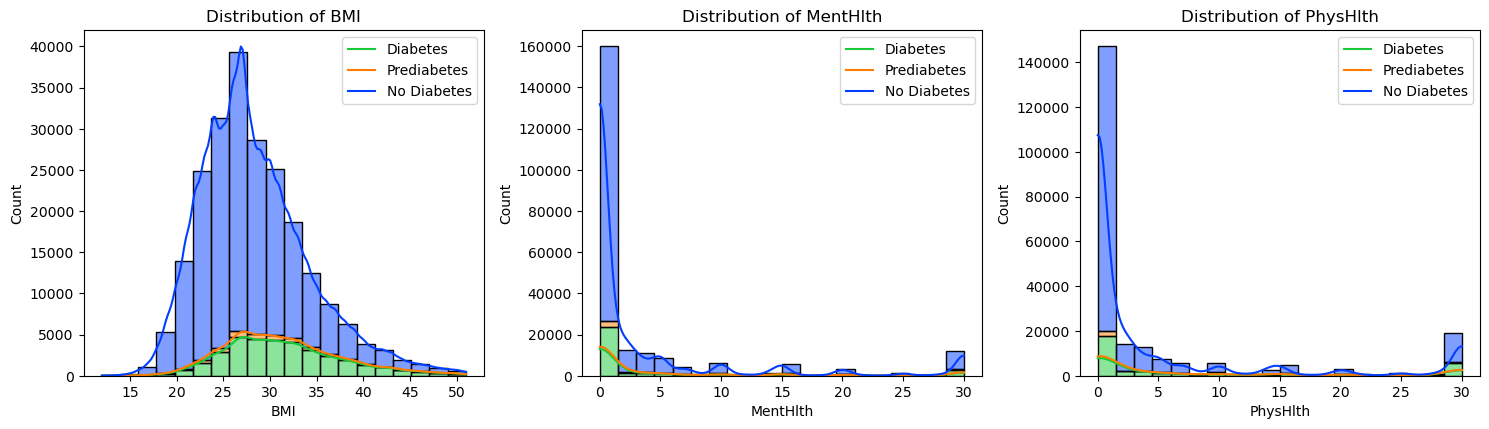

In [109]:
# Visualize numerical features via histplots

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features_numerical, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_raw, x=feature, kde=True, bins=20, hue='Diabetes_012', multiple='stack', palette='bright')
    plt.title(f'Distribution of {feature}')
    plt.legend(['Diabetes', 'Prediabetes','No Diabetes'])
 

plt.tight_layout()
plt.show()

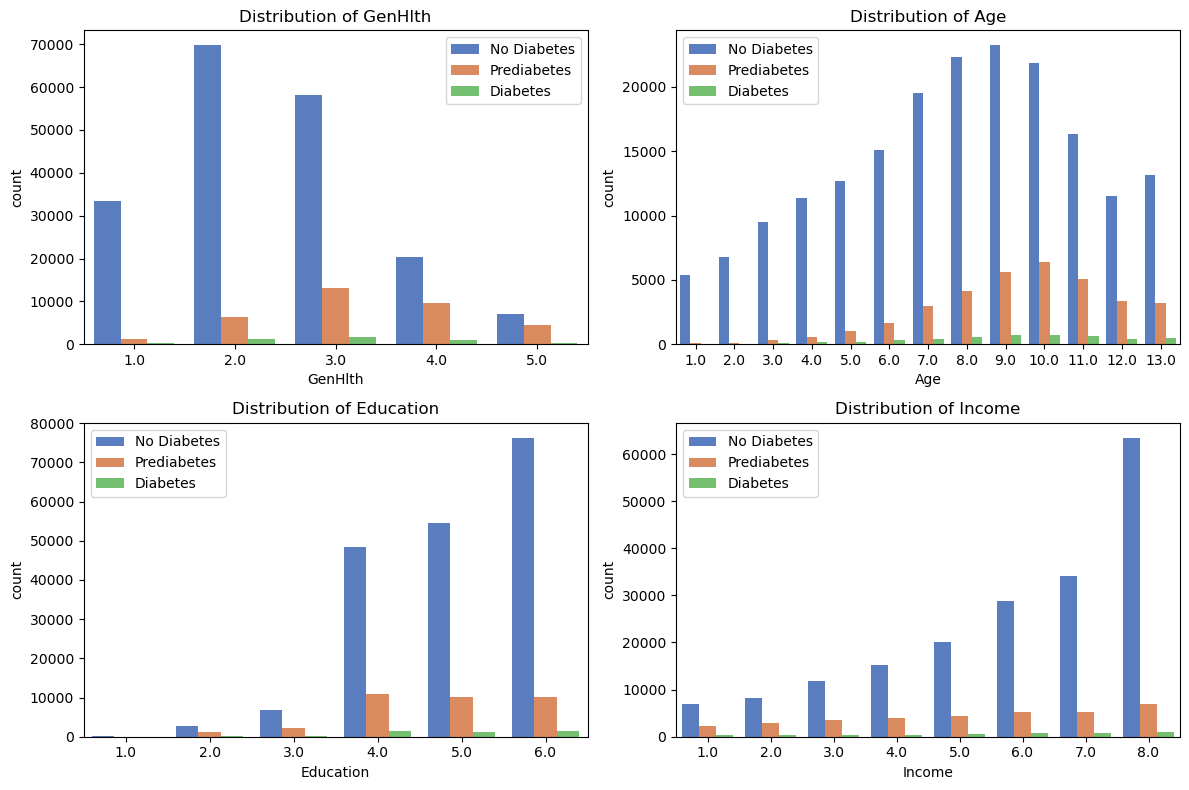

In [110]:
# Visualize ordinal features via countplots
# Set up subplots for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.subplots_adjust(hspace=0.5)

# Loop through ordinal features and create plots
for i, feature in enumerate(features_ordinal):
    row, col = i // 2, i % 2
    sns.countplot(x=feature, hue= df_raw.Diabetes_012.apply(str), data=df_raw, ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].legend(['No Diabetes', 'Prediabetes','Diabetes'])

plt.tight_layout()
plt.show()

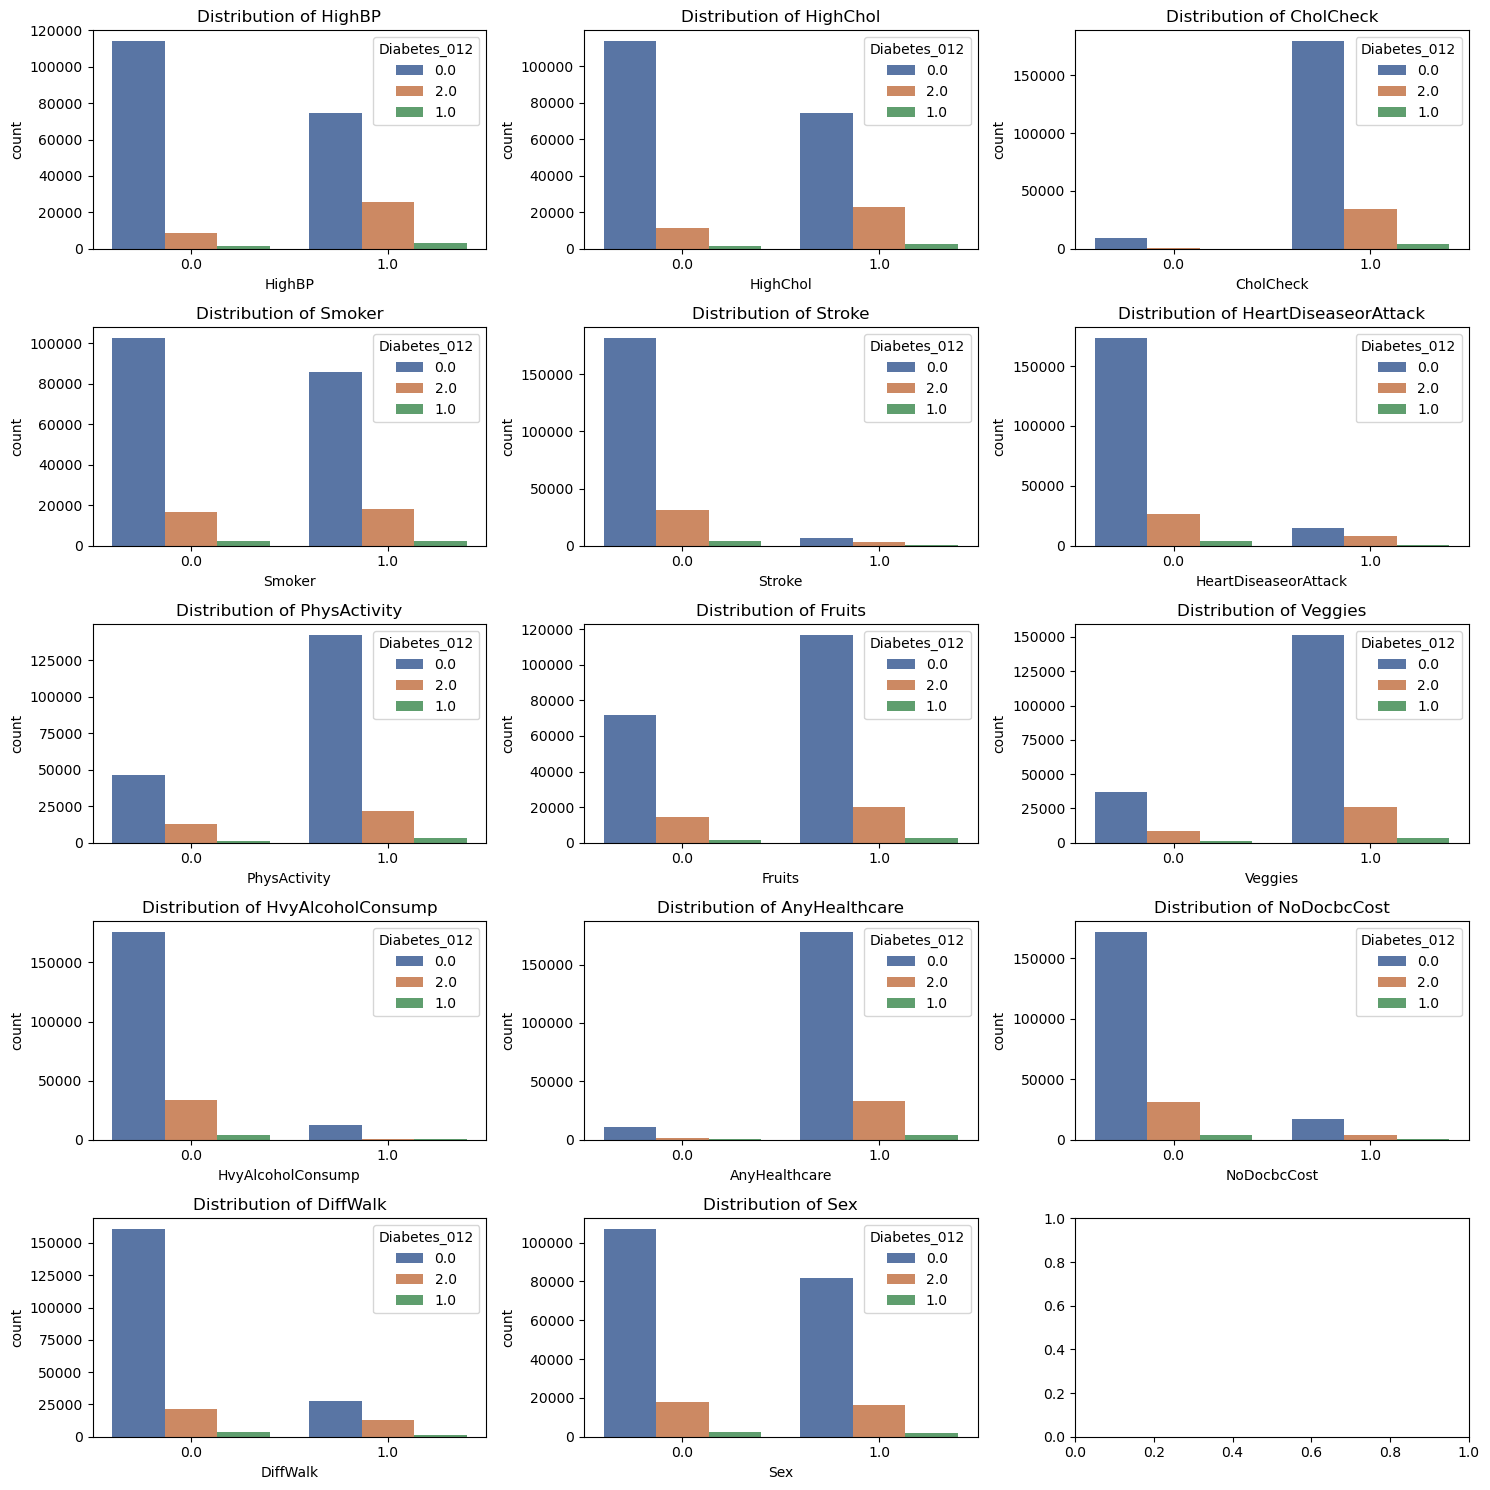

In [111]:
# Loop through binary features and create plots

# Set up subplots for plotting
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features_binary):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue= df_raw.Diabetes_012.apply(str), data=df_raw, ax=axes[row, col], palette='deep')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Correlation Matrix 



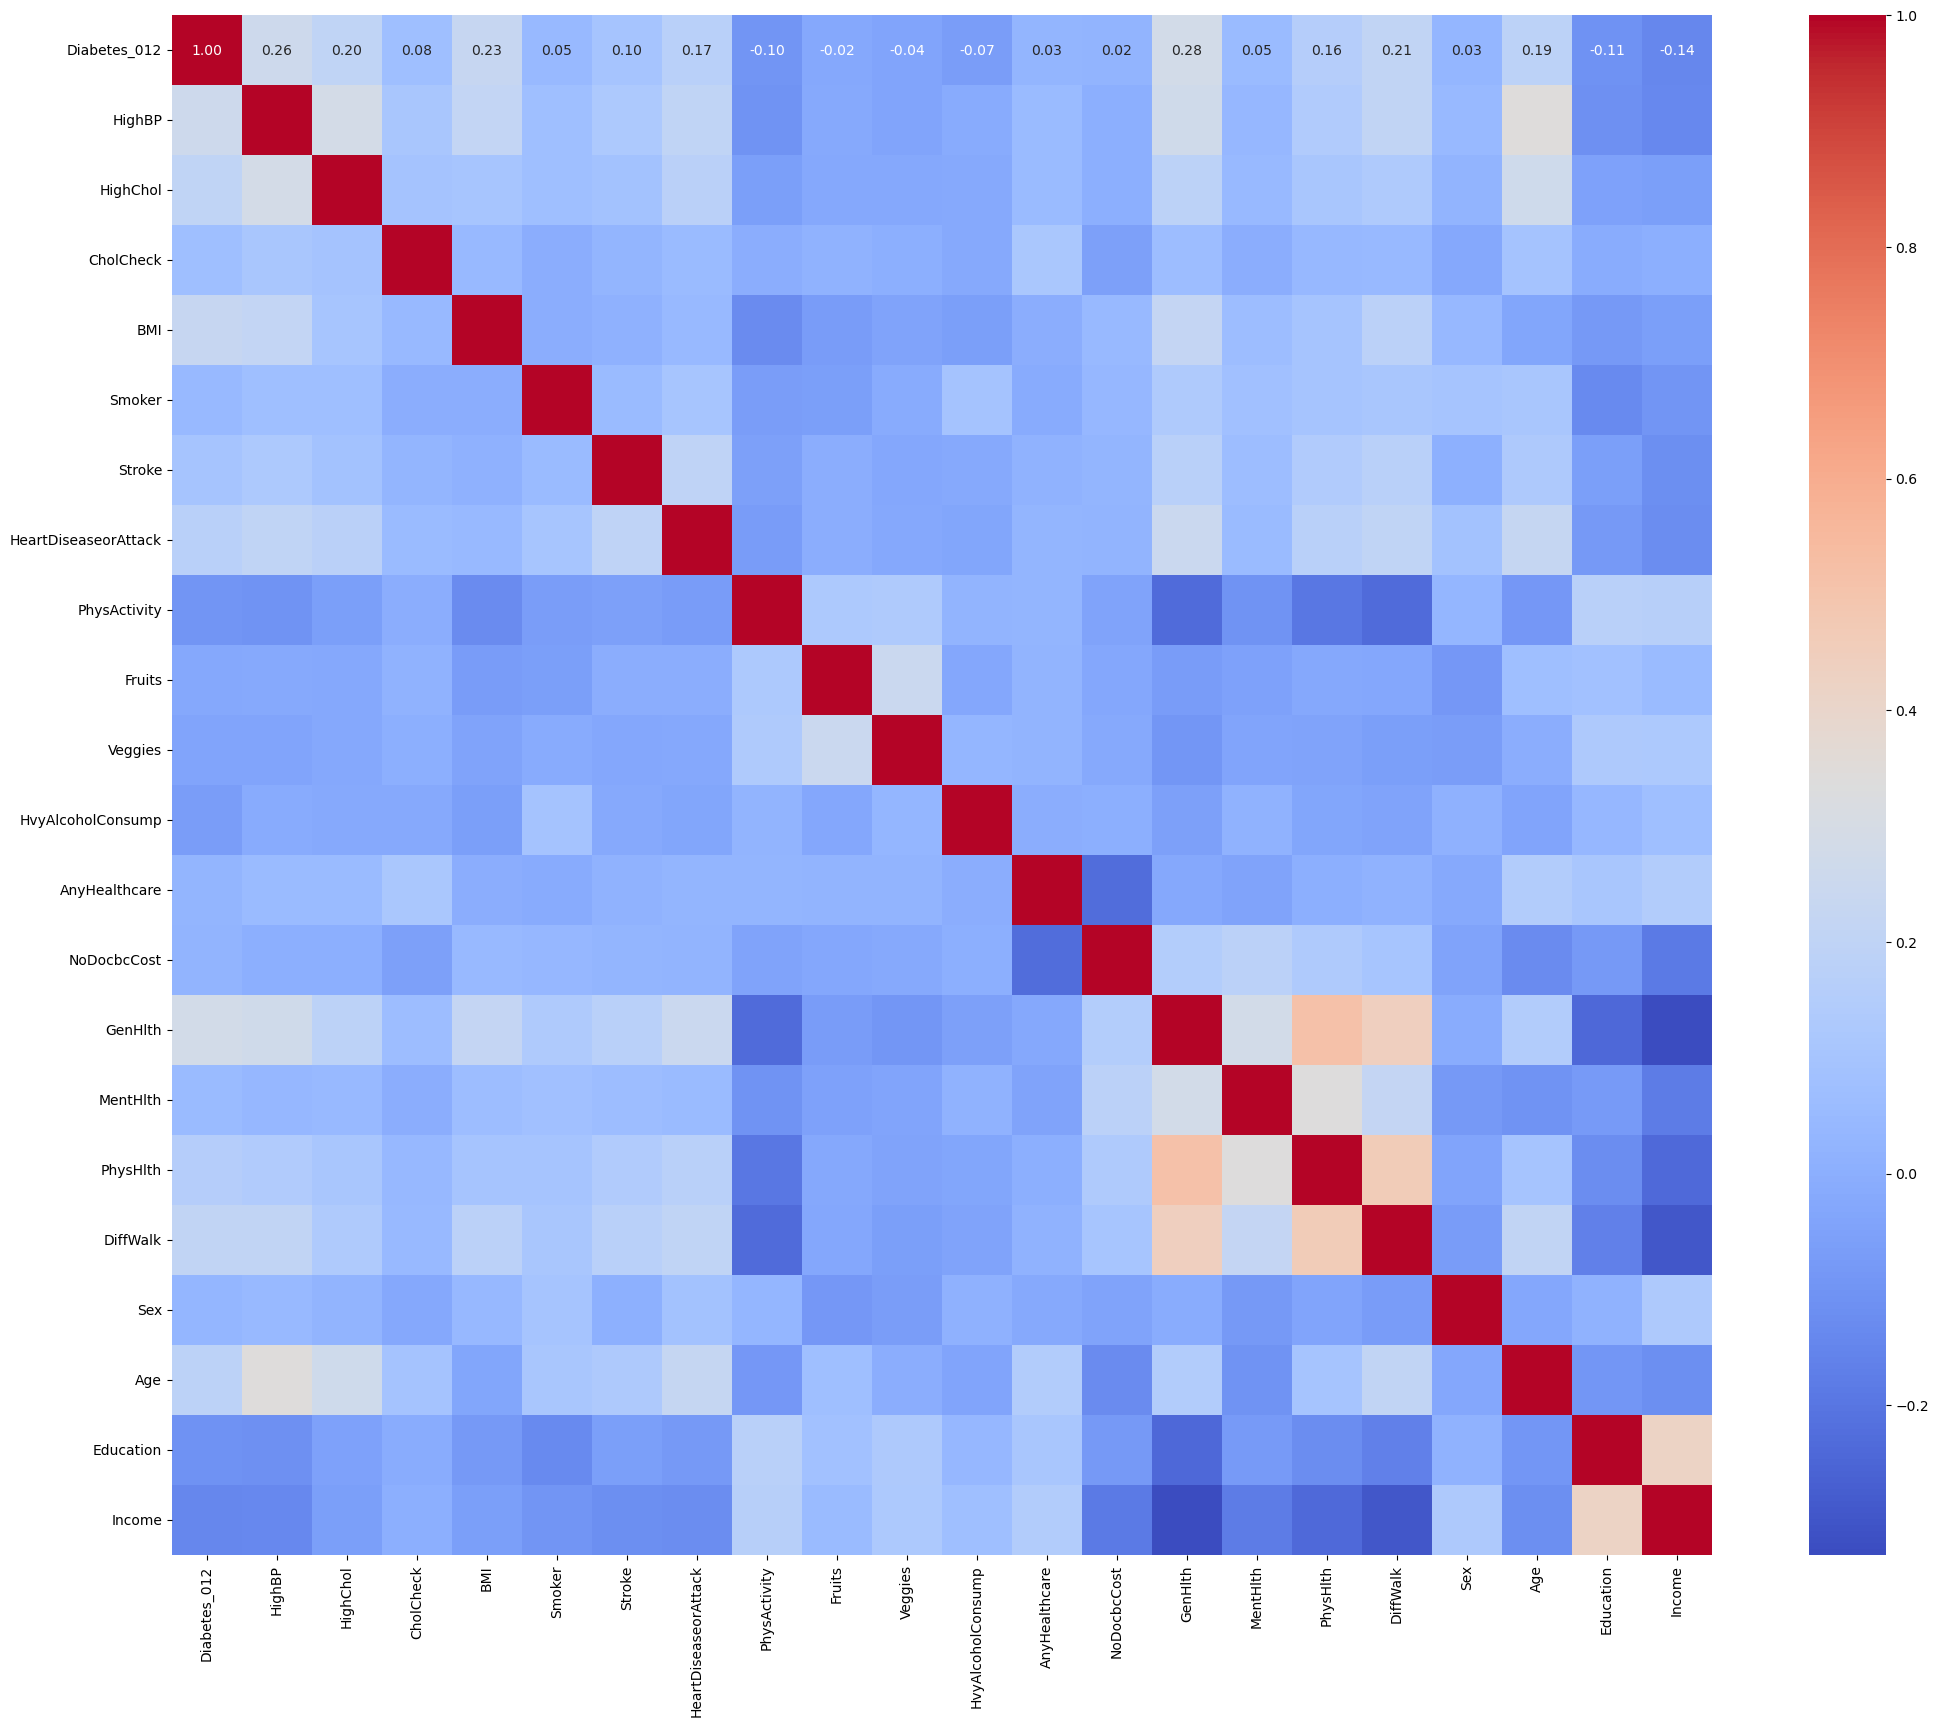

In [112]:
#Correlation - Heat map

print("Correlation Matrix","\n")    
correlation=df_raw.corr(method="pearson")
plt.figure(figsize=(25,20))
sns.heatmap(correlation,vmax=1,square=True,annot=True,fmt=".2f", cmap='coolwarm')
plt.show()

In [113]:
df_raw.corr()['Diabetes_012'].sort_values()

Income                 -0.144894
Education              -0.106442
PhysActivity           -0.100274
HvyAlcoholConsump      -0.066647
Veggies                -0.043086
Fruits                 -0.024705
NoDocbcCost             0.022642
AnyHealthcare           0.025300
Sex                     0.033712
Smoker                  0.047191
MentHlth                0.054878
CholCheck               0.075476
Stroke                  0.100500
PhysHlth                0.156533
HeartDiseaseorAttack    0.171130
Age                     0.186319
HighChol                0.202997
DiffWalk                0.206556
BMI                     0.228873
HighBP                  0.260503
GenHlth                 0.282357
Diabetes_012            1.000000
Name: Diabetes_012, dtype: float64

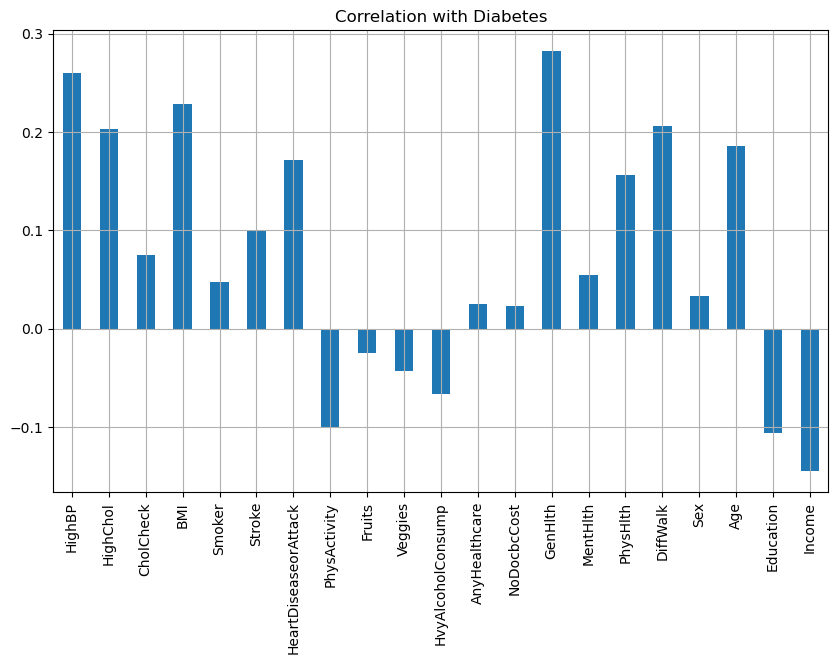

In [114]:
#Correlation plot with Diabetes
df_raw.drop('Diabetes_012', axis=1).corrwith(df_raw.Diabetes_012).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes")
plt.show();

#### **Observations from the above pairplot and correlations** 

1. Most of the diabetes people have high Blood Pressure (HighBP), high cholestrol (HighChol) and high BMI.
2. Both men and women are vulnerable to diabetes
3. Age groups most affected: 60-64, 65-70, 70-74.
4. Smoking and alcohol consumption have little effect on diabetes. 
5. Most of the diabetes people have less physical activity and difficulty walking.

##### **Additional Insights from the above correlation matrix** 

1. Poor general health is linked to both difficulty in walking and poorer physical health. 
2. Mental health is also affected similarly. 
3. Higher income levels might lead to better general health. 
4. BMI is positively correlated with Diabetes
5. HighChol and HighBP also have a positive correlation with Diabetes.



### Understanding the Task

After examining the description and data, the task is predicting diabetes and improving understanding of the relationship between lifestyle and diabetes in the US

In [115]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227859 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          227859 non-null  float64
 1   HighBP                227859 non-null  float64
 2   HighChol              227859 non-null  float64
 3   CholCheck             227859 non-null  float64
 4   BMI                   227859 non-null  float64
 5   Smoker                227859 non-null  float64
 6   Stroke                227859 non-null  float64
 7   HeartDiseaseorAttack  227859 non-null  float64
 8   PhysActivity          227859 non-null  float64
 9   Fruits                227859 non-null  float64
 10  Veggies               227859 non-null  float64
 11  HvyAlcoholConsump     227859 non-null  float64
 12  AnyHealthcare         227859 non-null  float64
 13  NoDocbcCost           227859 non-null  float64
 14  GenHlth               227859 non-null  float64
 15  MentH

### 2. Preparation for Predictive Modelling 

#### Preprocess data

1. Balance dataset
2. Transform data
3. Standardize data

#### Train and Test data split
Given the size of the dataset, spliting the data by 75:25 ratio


In [126]:
# Drop non-significant features - Feature engineering
df_raw = df_raw.drop(['NoDocbcCost', 'AnyHealthcare', 'Sex', 'Fruits', 'Smoker','Veggies'], axis=1)
#df_raw = df_raw.drop(['NoDocbcCost', 'AnyHealthcare', 'Sex'], axis=1)

In [127]:
df_features = df_raw.drop(['Diabetes_012'],axis=1)
df_target = df_raw["Diabetes_012"]


In [128]:
df_target.value_counts()

Diabetes_012
0.0    188796
2.0     34492
1.0      4571
Name: count, dtype: int64

In [129]:
#Balance dataset
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [130]:
# split the training data into positive and negative
rows_pos1 = df_raw.Diabetes_012 == 1 #Prediatetes
rows_pos = df_raw.Diabetes_012 == 2 #Diabetes


df_raw_pos = df_raw.loc[rows_pos]
df_raw_neg = df_raw.loc[~rows_pos]

df_raw_pos1 = df_raw_neg[rows_pos1]
df_raw_neg1 = df_raw_neg[~rows_pos1]

# merge the balanced data
df_raw_bal = pd.concat([df_raw_pos, df_raw_neg1.sample(n = len(df_raw_pos), random_state = 42)],axis = 0)
df_raw_bal1 = pd.concat([df_raw_pos1, df_raw_neg1.sample(n = len(df_raw_pos1), random_state = 42)],axis = 0)
df_bal_fin = pd.concat([df_raw_bal, df_raw_bal1],axis = 0)

# shuffle the order of training samples 
df_bal_fin = df_bal_fin.sample(n = len(df_bal_fin), random_state = 42).reset_index(drop = True)

print('Diabetes balanced dataset no of records: ', len(df_bal_fin))


Diabetes balanced dataset no of records:  78126


In [131]:
df_bal_fin["Diabetes_012"].value_counts()

Diabetes_012
0.0    39063
2.0    34492
1.0     4571
Name: count, dtype: int64

In [132]:
def preprocess_data(df_data):
    
    data_preprocessed=df_data.copy()

    ST=StandardScaler()

    data_preprocessed[['BMI']] = ST.fit_transform(data_preprocessed[['BMI']])
    data_preprocessed[['Age']] = ST.fit_transform(data_preprocessed[['Age']])
    data_preprocessed[['PhysHlth']] = ST.fit_transform(data_preprocessed[['PhysHlth']])
    data_preprocessed[['MentHlth']] = ST.fit_transform(data_preprocessed[['MentHlth']])
    
    # utilizing QuantileTransformer to stabilize variance and minimize skewness

    QT=QuantileTransformer(n_quantiles=500,output_distribution='normal')

    data_preprocessed[['BMI']] = QT.fit_transform(data_preprocessed[['BMI']])
    data_preprocessed[['Age']] = QT.fit_transform(data_preprocessed[['Age']])
    data_preprocessed[['PhysHlth']] = QT.fit_transform(data_preprocessed[['PhysHlth']])
    data_preprocessed[['MentHlth']] = QT.fit_transform(data_preprocessed[['MentHlth']])


    cat_features=['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck',
           'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
           'GenHlth',  'DiffWalk', 'Education', 'Income']


    le = LabelEncoder()
    for col in cat_features:
        data_preprocessed[col]=le.fit_transform( data_preprocessed[col])
        

    return data_preprocessed
    

In [133]:
# Preprocess unbalanced full dataset

df_full_cln = preprocess_data(df_raw)

dataoveriew(df_full_cln, 'Overiew of the full dataset after preprocessing the data','y')

Overiew of the full dataset after preprocessing the data:

Rows: 227859

Number of features: 16

Features:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']

Missing values: 0

Unique values:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     38
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Age                     13
Education                6
Income                   8
dtype: int64
Diabetes_012
[0 2 1]
HighBP
[1 0]
HighChol
[1 0]
CholCheck
[1 0]
BMI: 38 unique values
Stroke
[0 1]
HeartDiseaseorAttack
[0 1]
PhysActivity
[0 1]
HvyAlcoholConsump
[0 1]
GenHlth
[4 2 1 3 0]
MentHlth: 31 uni

In [134]:
# Preprocess balanced dataset

df_bal_cln = preprocess_data(df_bal_fin)

dataoveriew(df_bal_cln, 'Overiew of the balanced dataset after preprocessing the data','y')

Overiew of the balanced dataset after preprocessing the data:

Rows: 78126

Number of features: 16

Features:
['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']

Missing values: 0

Unique values:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     39
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Age                     13
Education                6
Income                   8
dtype: int64
Diabetes_012
[0 1 2]
HighBP
[1 0]
HighChol
[0 1]
CholCheck
[1 0]
BMI: 39 unique values
Stroke
[0 1]
HeartDiseaseorAttack
[0 1]
PhysActivity
[1 0]
HvyAlcoholConsump
[0 1]
GenHlth
[2 3 4 1 0]
MentHlth: 31 

In [135]:
# Split data for training and validation (75:25 ratio)  

target_col = ['Diabetes_012']
cols = [i for i in df_full_cln.columns if i not in target_col]

bcols = [i for i in df_bal_cln.columns if i not in target_col]


#splitting the full dataset to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df_full_cln[cols], df_full_cln[target_col], 
                                                    test_size = .25, random_state = 111)
                                                    

#splitting the balanced dataset dataset to train and test datasets
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(df_bal_cln[bcols], df_bal_cln[target_col], 
                                                    test_size = .25, random_state = 111)


In [136]:
def diabetes_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf):
    start_time = time.time()
    cf_substr = "grid"
    algorithm.fit(training_x, training_y)
    
    # Use best model from GridSearchCV or RandomSearchCV algorithms
    if cf_substr in cf:
        algorithm = algorithm.best_estimator_
      #  algorithm.fit(training_x, training_y)
    
    predictions = algorithm.predict(testing_x.values)
    probabilities = algorithm.predict_proba(testing_x.values)
         
    end_time = time.time()

    training_time = end_time - start_time
        
    print('Algorithm:', type(algorithm).__name__)
    print('Time took for training:', training_time)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    print("Balanced Accuracy Score:", balanced_accuracy_score(testing_y, predictions))
    
    #confusion matrix
    labels = ["No Diabetes", "Prediabetes", "Diabetes"]
    conf_matrix = confusion_matrix(testing_y, predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, probabilities, multi_class='ovr') 
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr = {}
    tpr = {}
    thresh ={}
    n_class = 3

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(testing_y, probabilities[:,i], pos_label=i)

    # plotting ROC Curve
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.plot(fpr[0], tpr[0], marker='.', linestyle='-',color='orange', label='No Diabetes vs Rest')
    plt.plot(fpr[1], tpr[1], marker='.',linestyle='-',color='green', label='Prediabetes vs Rest')
    plt.plot(fpr[2], tpr[2], marker='.',linestyle='-',color='blue', label='Diabetes vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()

    
    # Visualize Confusion Matrix

    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
    disp.plot()
    plt.show()
       
    if cf in ['coefficients', 'features', 'coefficients_grid', 'features_grid']:
        if cf in ['coefficients', 'coefficients_grid']:
            coefficients = pd.DataFrame(algorithm.coef_[0])#.ravel())
        elif cf in ['features', 'features_grid']:
            coefficients = pd.DataFrame(algorithm.feature_importances_)
            
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
        
      
        # Visualize Feature importance via seaborn bar plot 

        ax = sns.barplot(data=coef_sumry.head(12), x='coefficients', y='features')
        ax.set_title("Visualize Feature Importance by feature scores")
        ax.set_xlabel("Feature importance score")
        ax.set_ylabel("Features")
        plt.show()

In [137]:
#gives model report in dataframe
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    grid_substr = "CV"
    start_time = time.time()
    
    model = model.fit(training_x, training_y)
    # Use best model from GridSearchCV or RandomSearchCV algorithms
    if grid_substr in name:
        model = model.best_estimator_
      #  model.fit(training_x, training_y)
    end_time = time.time()
    training_time = end_time - start_time
    predictions = model.predict(testing_x.values)
    probabilities = model.predict_proba(testing_x.values)
    accuracy = accuracy_score(testing_y, predictions)
    bal_accuracy = balanced_accuracy_score(testing_y, predictions)
    recallscore = recall_score(testing_y, predictions, average='weighted')
    precision = precision_score(testing_y, predictions, average='weighted')
    roc_auc = roc_auc_score(testing_y, probabilities, multi_class='ovr',average='weighted')
    f1score = f1_score(testing_y, predictions, average='weighted') 
    kappa_metric = cohen_kappa_score(testing_y, predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Training_time"   : [training_time],
                       "Accuracy"        : [accuracy],
                       "Bal_accuracy"    : [bal_accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "Roc_auc"         : [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [138]:
def output_tracer(df, metric, color):
    tracer = go.Bar(y = df["Model"],
                    x = df[metric],
                    orientation = "h", name = metric ,
                    marker = dict(line = dict(width =.7), color = color)
                   )
    return tracer

def modelmetricsplot(df, title):
    layout = go.Layout(dict(title = title,
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )
    trace0 = output_tracer(df, "Training_time", "purple")
    trace1 = output_tracer(df, "Accuracy", "#6699FF")
    trace2 = output_tracer(df, 'Recall', "red")
    trace3 = output_tracer(df, 'Precision', "#33CC99")
    trace4 = output_tracer(df, 'f1-score', "lightgrey")
    trace5 = output_tracer(df, 'Roc_auc', "magenta")
    trace6 = output_tracer(df, 'Kappa_metric', "#FFCC99")
    trace7 = output_tracer(df, 'Bal_accuracy', "orange")

    data = [trace1, trace7, trace2, trace3, trace4, trace5, trace6] #, trace0]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

### 3. Machine Learning Models
#### 3.1 Simple models without Hyper parameter tuning

1. LogisticRegression
2. DecisionTreeClassifier
3. XGBoost
4. RandomForest


Algorithm: LogisticRegression
Time took for training: 1.81956148147583

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91     47188
           1       0.00      0.00      0.00      1139
           2       0.55      0.17      0.26      8638

    accuracy                           0.83     56965
   macro avg       0.47      0.38      0.39     56965
weighted avg       0.79      0.83      0.79     56965

Accuracy Score: 0.8343017642412007
Balanced Accuracy Score: 0.3826304983374007
Area under curve: 0.7592818564942118 



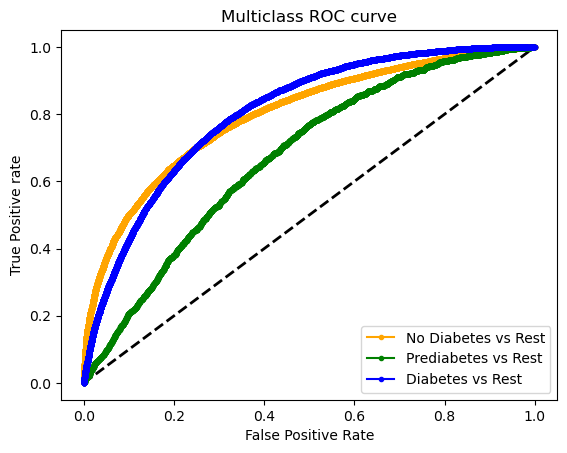

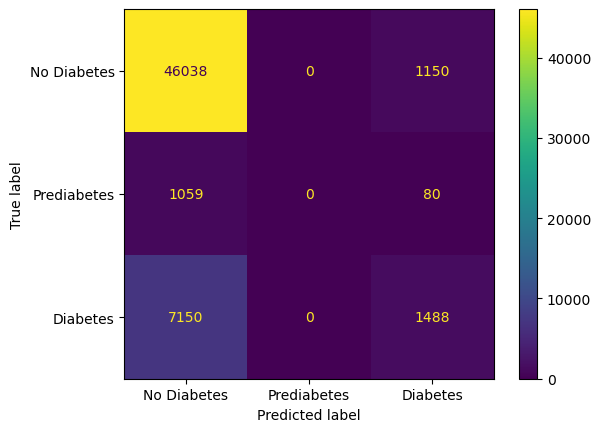

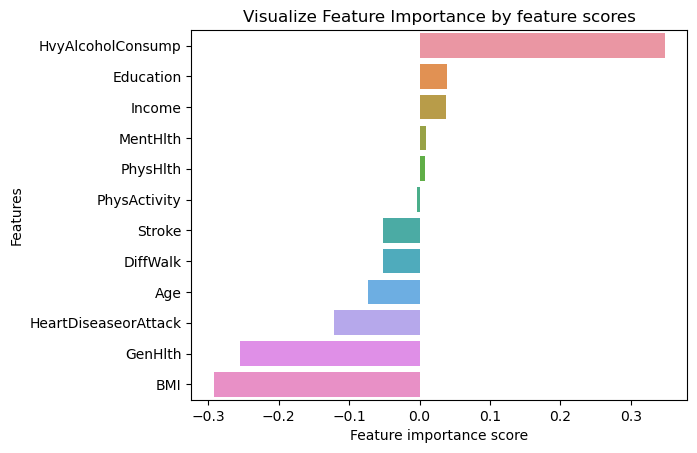

Algorithm: LogisticRegression
Time took for training: 0.615297794342041

Classification report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72      9729
           1       0.00      0.00      0.00      1174
           2       0.66      0.72      0.69      8629

    accuracy                           0.69     19532
   macro avg       0.46      0.49      0.47     19532
weighted avg       0.64      0.69      0.66     19532

Accuracy Score: 0.6851832889617039
Balanced Accuracy Score: 0.4855221855506698
Area under curve: 0.7300913167487089 



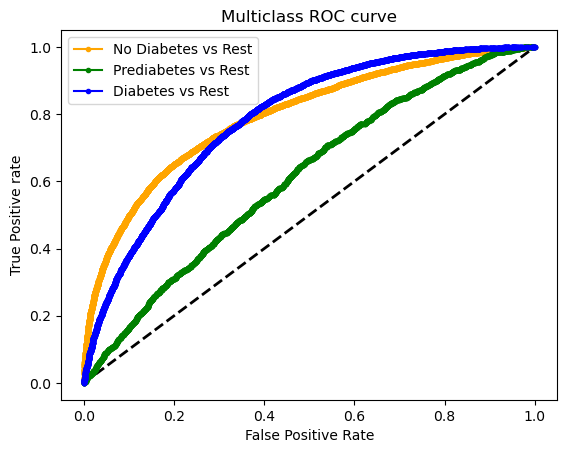

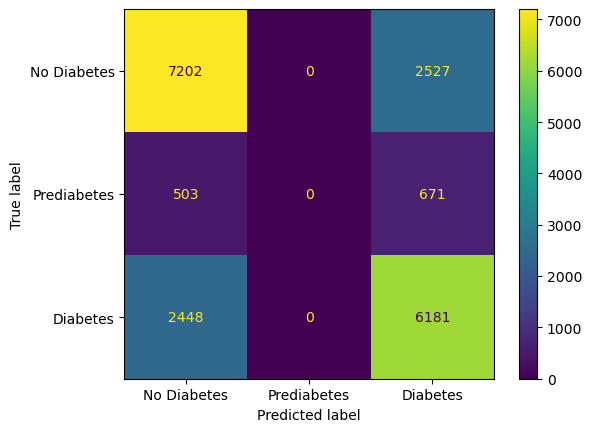

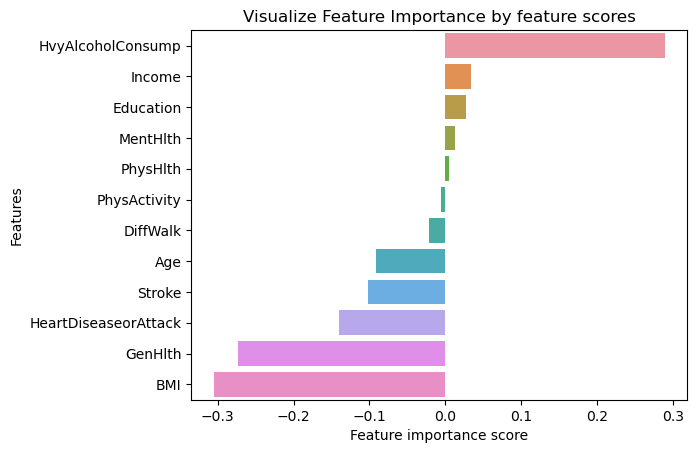

In [141]:
#simple LogisticRegression model with full imbalanced dataset      
logit = LogisticRegression(random_state = 42, multi_class='multinomial', solver='lbfgs')

diabetes_prediction(logit, X_train, X_test, y_train, y_test, "coefficients")

#simple LogisticRegression model with full imbalanced dataset  
logit_bal = LogisticRegression(random_state = 42, multi_class='multinomial', solver='lbfgs') #multi_class='ovr')

diabetes_prediction(logit_bal, X_train_bal, X_test_bal, y_train_bal, y_test_bal, "coefficients")


Algorithm: DecisionTreeClassifier
Time took for training: 0.48172450065612793

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     47188
           1       0.03      0.03      0.03      1139
           2       0.30      0.30      0.30      8638

    accuracy                           0.76     56965
   macro avg       0.40      0.40      0.40     56965
weighted avg       0.76      0.76      0.76     56965

Accuracy Score: 0.75651715965944
Balanced Accuracy Score: 0.39550291615411154
Area under curve: 0.565428727641568 



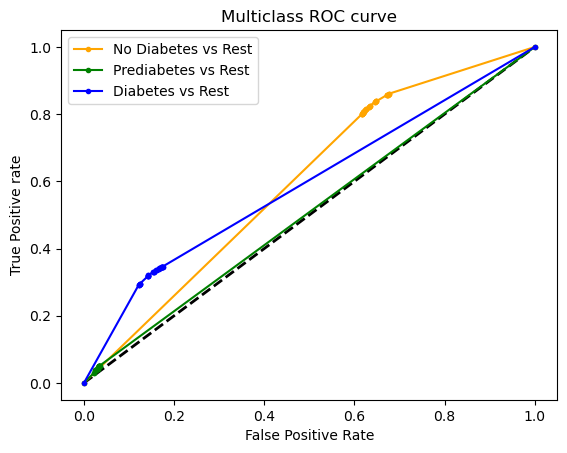

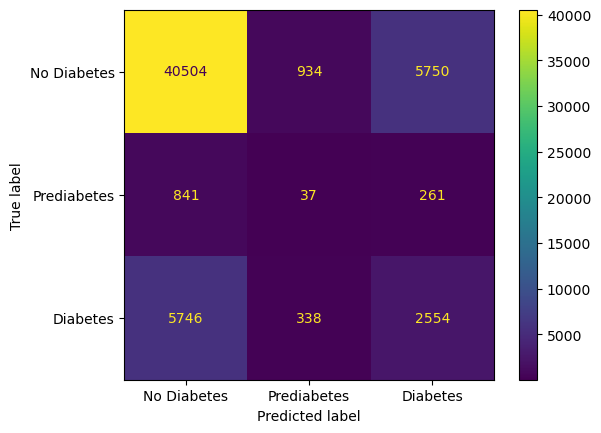

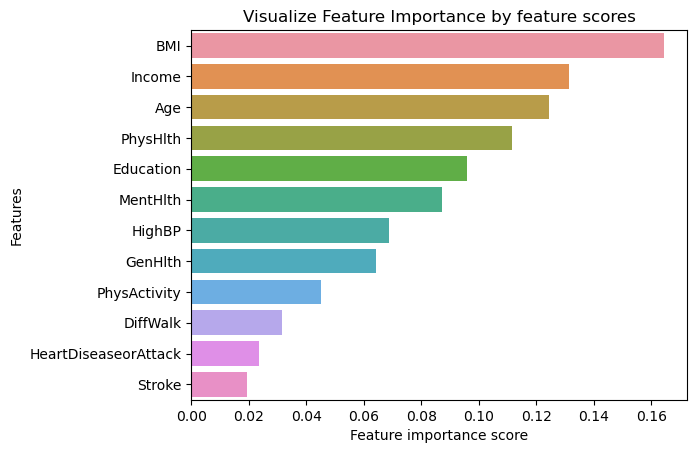

Algorithm: DecisionTreeClassifier
Time took for training: 0.18338322639465332

Classification report:
               precision    recall  f1-score   support

           0       0.65      0.69      0.67      9729
           1       0.07      0.07      0.07      1174
           2       0.61      0.57      0.59      8629

    accuracy                           0.60     19532
   macro avg       0.45      0.44      0.44     19532
weighted avg       0.60      0.60      0.60     19532

Accuracy Score: 0.59988736432521
Balanced Accuracy Score: 0.44480402945535547
Area under curve: 0.6049015437409481 



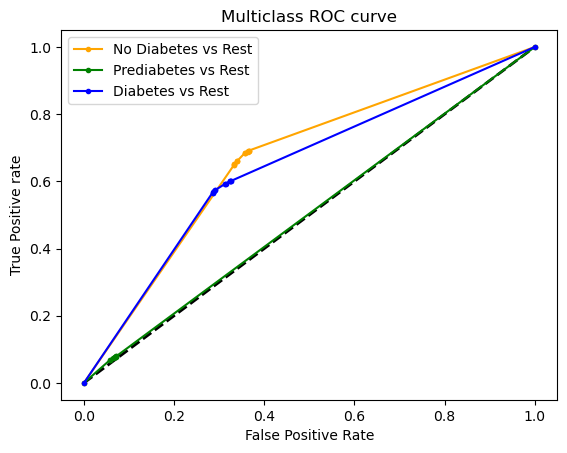

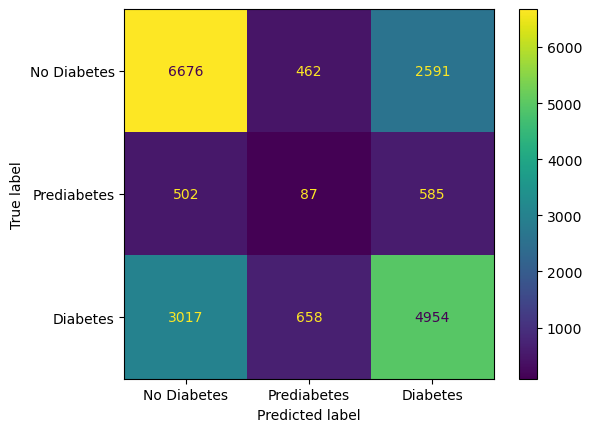

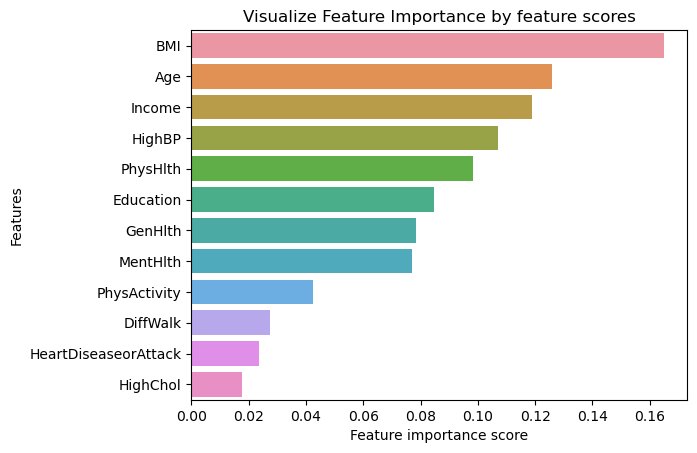

In [145]:
#Simple decision tree model for full unbalanced dataset

decision_tree = DecisionTreeClassifier(random_state = 42)

diabetes_prediction(decision_tree, X_train, X_test, y_train, y_test, "features")


#Simple decision tree model for balanced dataset
decision_tree_bal = DecisionTreeClassifier(random_state = 42)
diabetes_prediction(decision_tree_bal, X_train_bal, X_test_bal, y_train_bal, y_test_bal, "features")



Algorithm: XGBClassifier
Time took for training: 1.1746397018432617

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     47188
           1       0.00      0.00      0.00      1139
           2       0.55      0.19      0.28      8638

    accuracy                           0.84     56965
   macro avg       0.47      0.39      0.40     56965
weighted avg       0.79      0.84      0.79     56965

Accuracy Score: 0.8354252611252524
Balanced Accuracy Score: 0.3865818919602544
Area under curve: 0.7625799971614425 



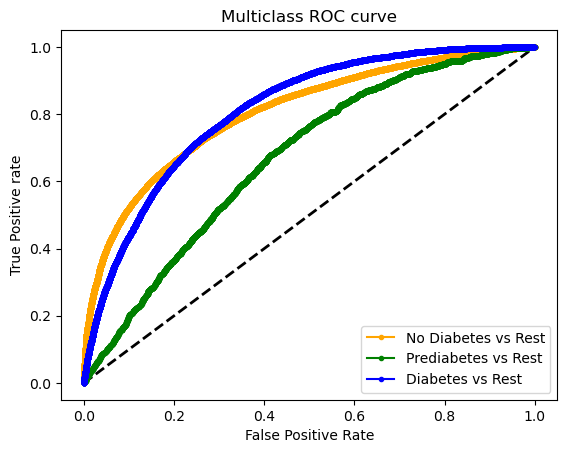

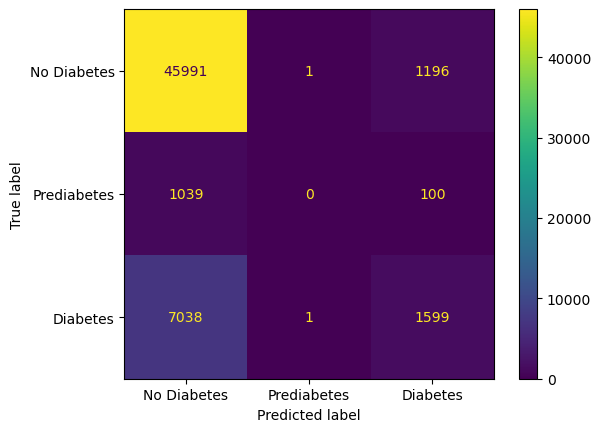

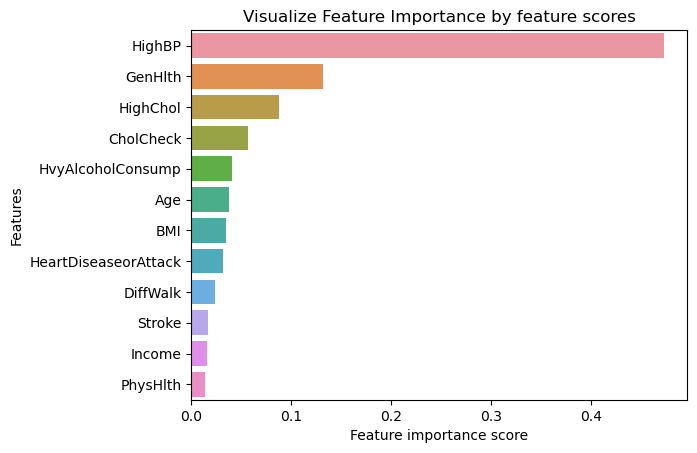

Algorithm: XGBClassifier
Time took for training: 0.4061000347137451

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      9729
           1       0.00      0.00      0.00      1174
           2       0.65      0.75      0.70      8629

    accuracy                           0.69     19532
   macro avg       0.46      0.49      0.48     19532
weighted avg       0.65      0.69      0.67     19532

Accuracy Score: 0.6914806471431497
Balanced Accuracy Score: 0.4911427573834926
Area under curve: 0.7289106515293936 



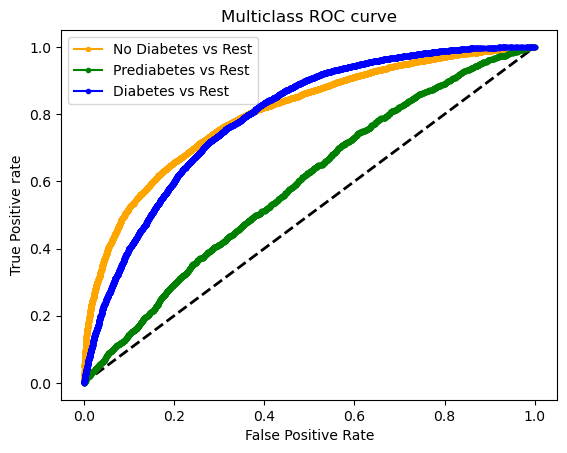

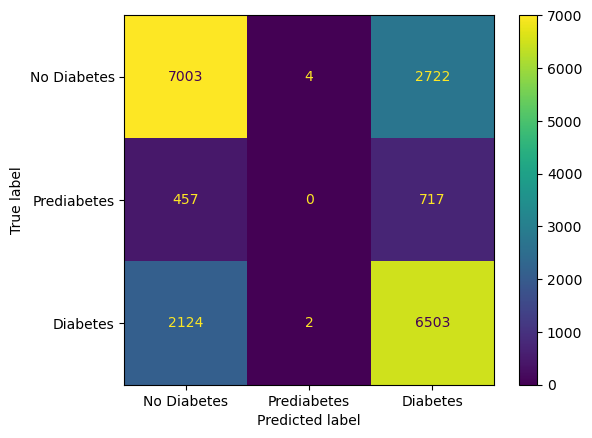

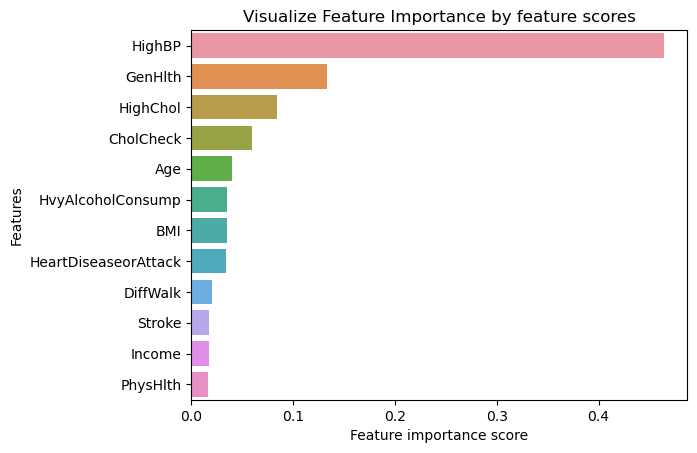

In [146]:
# Simple XGBoost model with unbalanced full dataset  
xgb = XGBClassifier(random_state = 42)
diabetes_prediction(xgb,X_train, X_test, y_train, y_test, "features")


#XGBoost model for balanced dataset
xgb_bal = XGBClassifier(random_state = 42)

diabetes_prediction(xgb_bal,X_train_bal, X_test_bal, y_train_bal, y_test_bal, "features")



Algorithm: RandomForestClassifier
Time took for training: 13.205147504806519

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     47188
           1       0.02      0.00      0.00      1139
           2       0.43      0.21      0.29      8638

    accuracy                           0.82     56965
   macro avg       0.43      0.39      0.40     56965
weighted avg       0.77      0.82      0.79     56965

Accuracy Score: 0.8177828491178794
Balanced Accuracy Score: 0.3881873213908294
Area under curve: 0.7044230456350534 



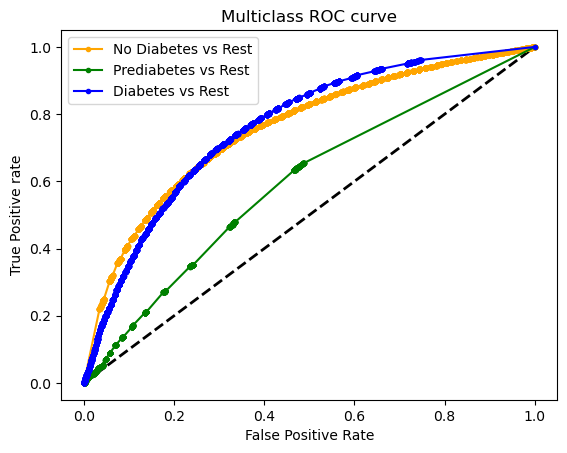

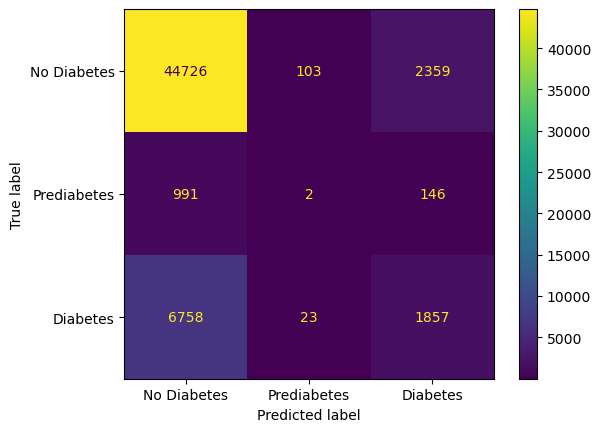

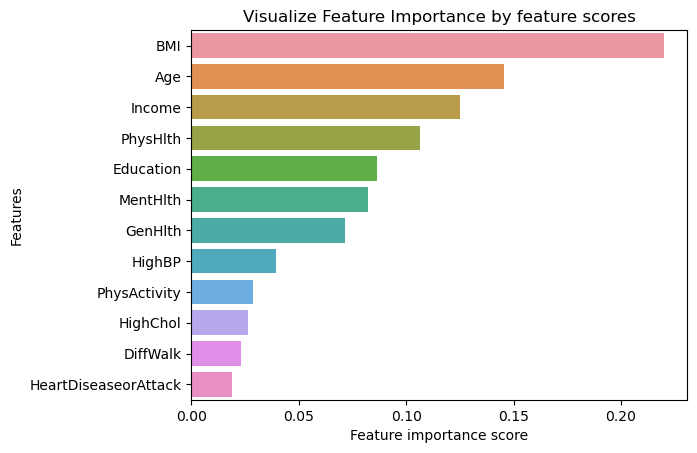

Algorithm: RandomForestClassifier
Time took for training: 4.437895774841309

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73      9729
           1       0.05      0.01      0.01      1174
           2       0.66      0.73      0.69      8629

    accuracy                           0.69     19532
   macro avg       0.48      0.49      0.48     19532
weighted avg       0.65      0.69      0.67     19532

Accuracy Score: 0.6873336063895147
Balanced Accuracy Score: 0.48898330078392754
Area under curve: 0.713848668188802 



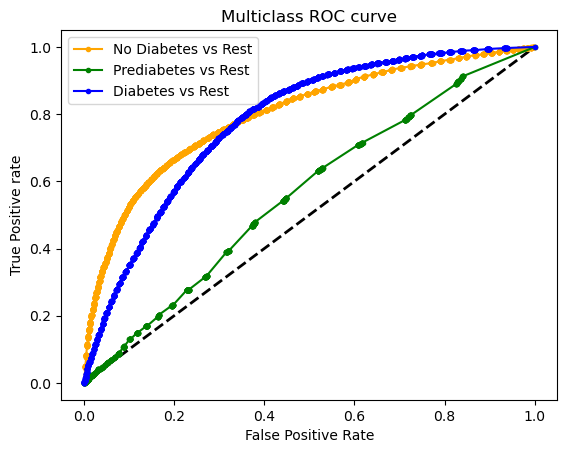

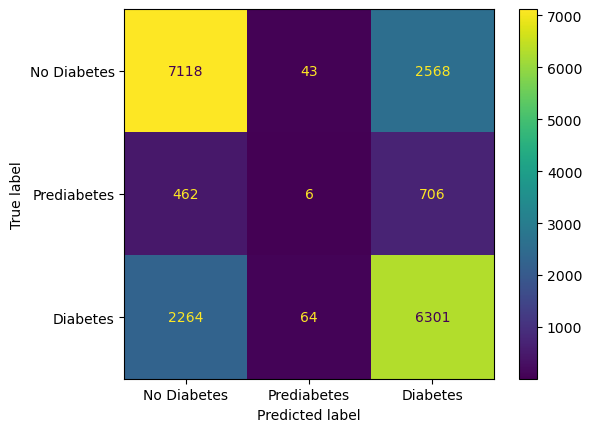

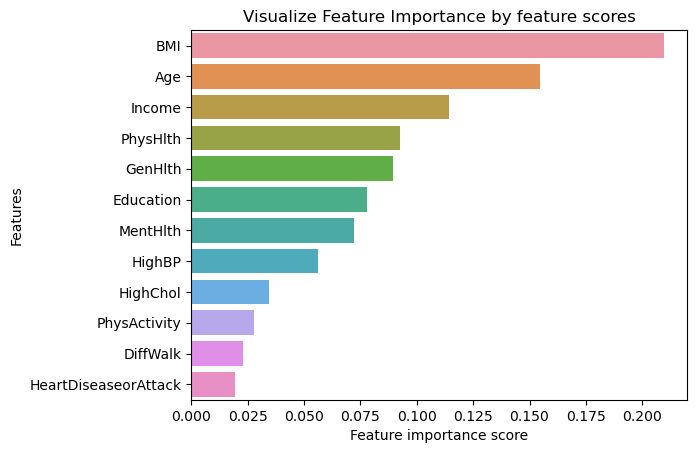

In [147]:
# Simple RandomForest model with unbalanced full dataset  
rfc = RandomForestClassifier(random_state=42)
diabetes_prediction(rfc,X_train, X_test, y_train, y_test, "features")


#RandomForest model for balanced dataset
rfc_bal = RandomForestClassifier(random_state=42)
diabetes_prediction(rfc_bal,X_train_bal, X_test_bal, y_train_bal, y_test_bal, "features")


In [148]:
#putting all the model names, model classes and the used columns in a dictionary for both fullset and balanced set 

models = {'Logistic(full)': [logit, cols],
          'Logistic(bal)': [logit_bal, bcols],
          'DecisionTree(full)': [decision_tree, cols],
          'DecisionTree (bal)': [decision_tree_bal, bcols],
          'XGBoost(full)': [xgb, cols],
          'XGBoost (bal)': [xgb_bal, bcols],
          'RandomForest(full)': [rfc, cols],
          'RandomForest (bal)': [rfc_bal, bcols]
         }

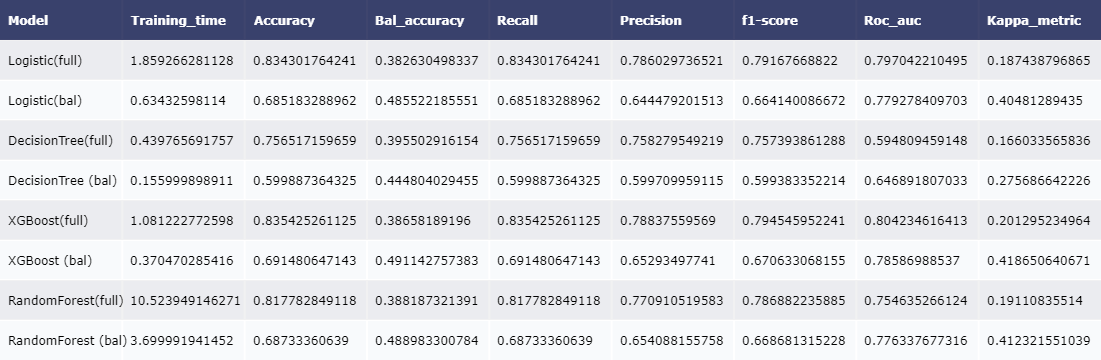

In [152]:
#outputs for all models over the training dataset
# ****** please note it is taking 25 seconds to run this cell **********
model_performances_train = pd.DataFrame() 
substr = 'bal'
for name in models:
       if substr in name:
            model_performances_train = pd.concat([model_performances_train, (model_report(models[name][0], X_train_bal[models[name][1]], 
                                                                                X_test_bal[models[name][1]], 
                                                                                y_train_bal, y_test_bal, name))])
       else:
            model_performances_train = pd.concat([model_performances_train, (model_report(models[name][0], X_train[models[name][1]], 
                                                                                X_test[models[name][1]], 
                                                                                y_train, y_test, name))])
table_train = ff.create_table(np.round(model_performances_train, 12))
py.iplot(table_train)

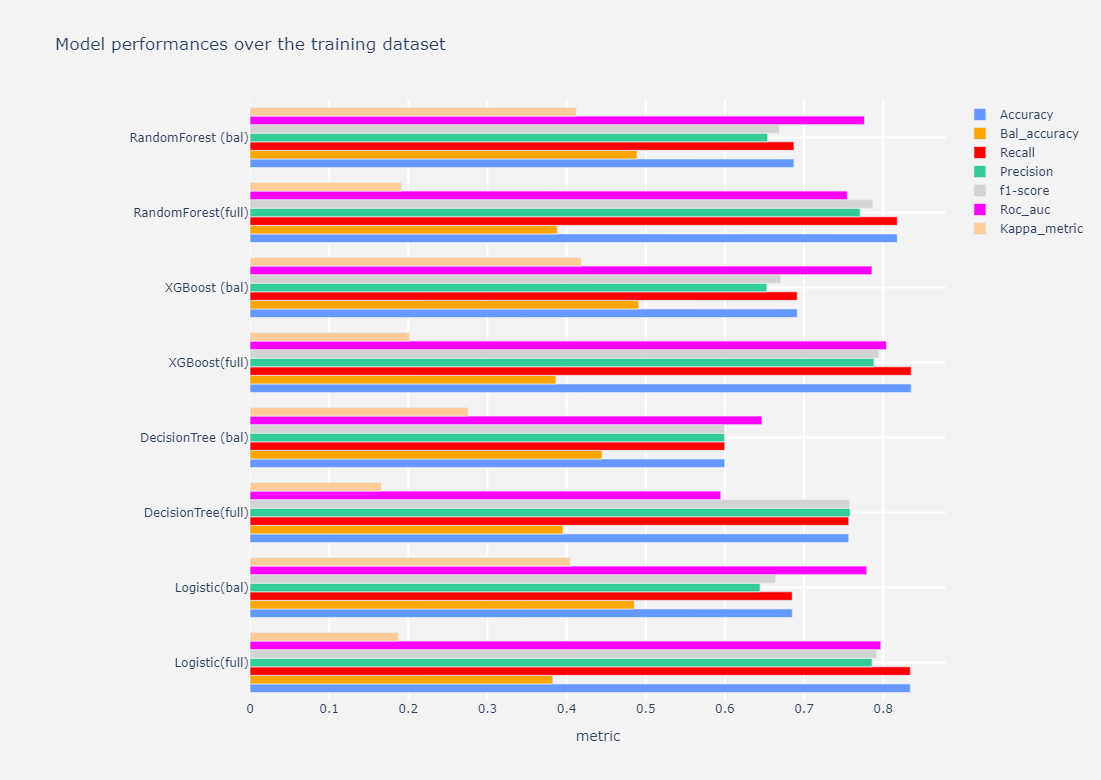

In [153]:
modelmetricsplot(df=model_performances_train, title="Model performances over the training dataset")

#### 3.1.1 Initial model performance results

##### Conclusion from simple models
Based on the results of the baseline model using a full imbalanced dataset, it appears that LogisticRegression and DecisionTree models are heavily overfitting towards the majority class with F1-score of 0.91, 0.83 & recall of 0.97, 0.85 for Class 0 (No Diabetes), but poor F1-score of 0.27, 0.32 and recall of 0.18, 0.30 for the minority class (Class 2, diabetes)

Through this project, we created simple machine-learning models (without optimized hyperparameters)to predict Diabetes. After performing model comparisons between LogisticRegression, DecisionTree, XGBoost, and RandomForest models, using both Unbalanced and balanced datasets, the best model was the RandomFrest classifier. The model's performance is 69.5%, with the latter (XGBoost) slightly edging out due to its slightly higher recall of 69.5%. XGBoost's performance is very close to RandomForest. It is also suggested to have a better reputation for handling complex datasets.

Key findings included the identification of crucial risk factors and the effectiveness of early intervention strategies.


#### 3.2 Optimising Models with GridSearchCV and RandomizedSearchCV
1. LogisticRegression
2. DecisionTreeClassifier
3. XGBoost
4. RandomForest


Algorithm: LogisticRegression
Time took for training: 31.317907094955444

Classification report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72      9729
           1       0.00      0.00      0.00      1174
           2       0.66      0.72      0.69      8629

    accuracy                           0.69     19532
   macro avg       0.46      0.49      0.47     19532
weighted avg       0.64      0.69      0.66     19532

Accuracy Score: 0.6851832889617039
Balanced Accuracy Score: 0.4855221855506698
Area under curve: 0.7300913167487089 



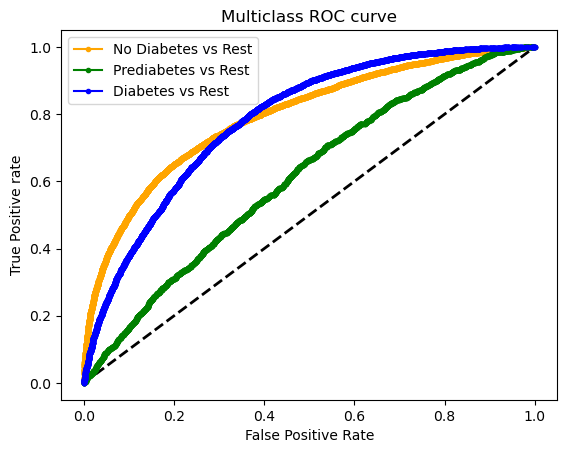

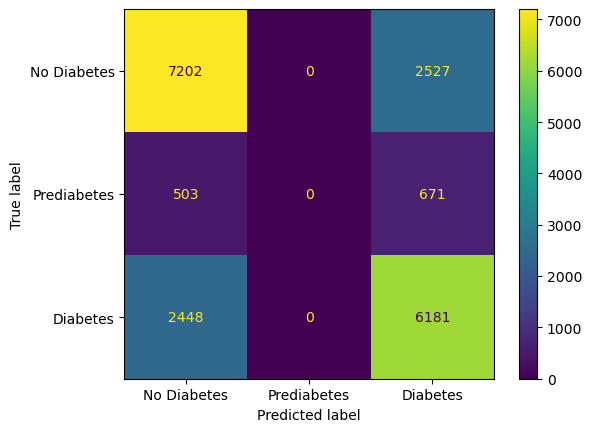

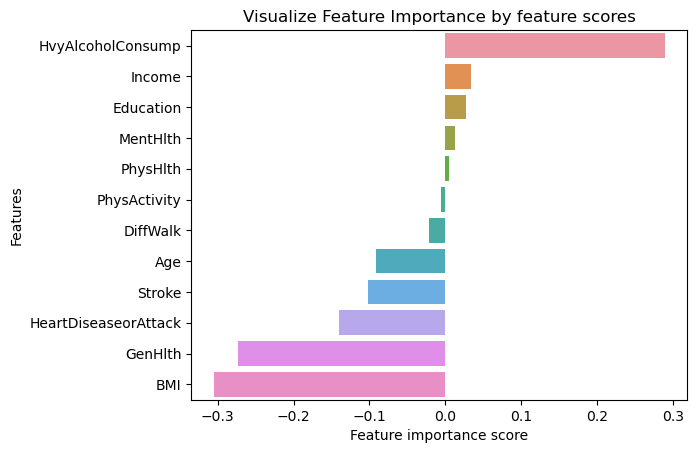

In [179]:
# Hyperparamerter tuning -Logistic Regression with balanced dataset
# ****** please note it is taking 32 seconds to run this cell **********

log_reg_bal = LogisticRegression(random_state=42, multi_class='multinomial')

param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' :[0.1, 1, 10, 50],
    'solver' : ['lbfgs','sag']}
]

logistic_grid_bal = GridSearchCV(log_reg_bal,param_grid, cv=5)
diabetes_prediction(logistic_grid_bal, X_train_bal, X_test_bal, y_train_bal, y_test_bal, "coefficients_grid")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Algorithm: DecisionTreeClassifier
Time took for training: 5.764299631118774

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      9729
           1       0.08      0.00      0.01      1174
           2       0.65      0.73      0.69      8629

    accuracy                           0.68     19532
   macro avg       0.48      0.48      0.47     19532
weighted avg       0.65      0.68      0.66     19532

Accuracy Score: 0.6811898423100553
Balanced Accuracy Score: 0.4846484191538005
Area under curve: 0.7084823399086293 



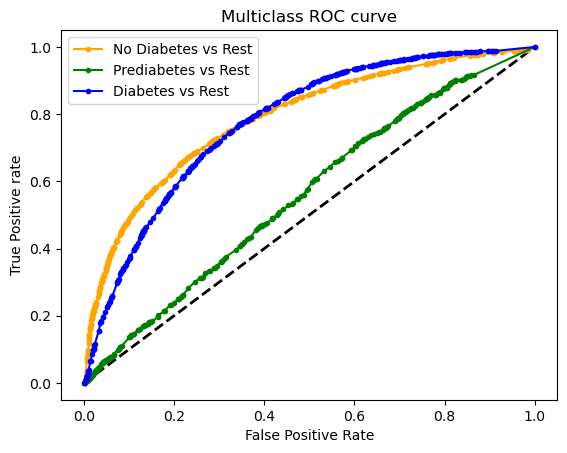

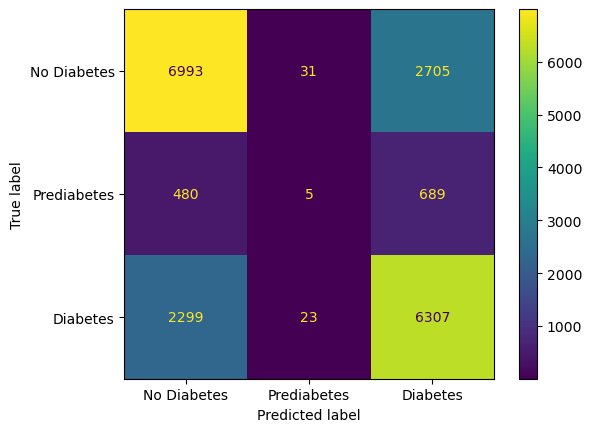

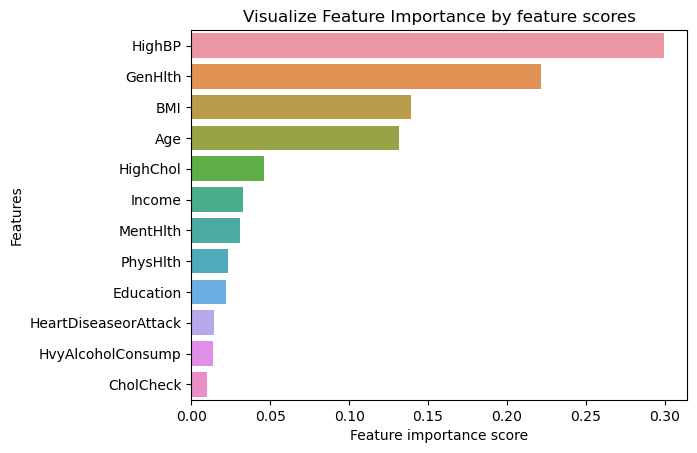

In [180]:
# Hyperparameter tuning - DecisionTreeClassifier for balanced dataset
# ****** please note it is taking 5 seconds to run this cell **********

dt_bal = DecisionTreeClassifier()
param_grid = {
    'max_depth': [10, 20, 30, 40],
   # 'min_samples_split': [2, 5, 10, 15],
  #  'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}
dt_grid_bal = GridSearchCV(dt_bal, param_grid, cv=5, n_jobs=-1, scoring='accuracy',verbose=3)

diabetes_prediction(dt_grid_bal, X_train_bal, X_test_bal, y_train_bal, y_test_bal, "features_grid")

Algorithm: XGBClassifier
Time took for training: 74.4021463394165

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      9729
           1       0.00      0.00      0.00      1174
           2       0.66      0.75      0.70      8629

    accuracy                           0.69     19532
   macro avg       0.46      0.49      0.48     19532
weighted avg       0.65      0.69      0.67     19532

Accuracy Score: 0.6921974196190867
Balanced Accuracy Score: 0.49158311459702686
Area under curve: 0.7288455921390918 



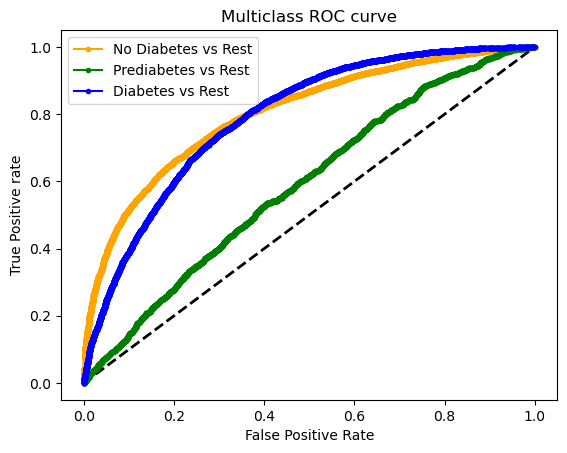

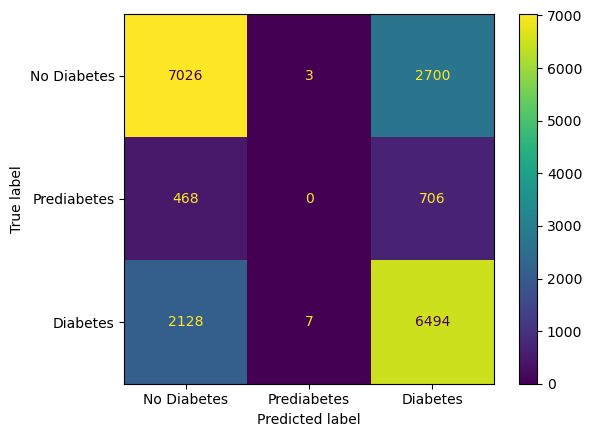

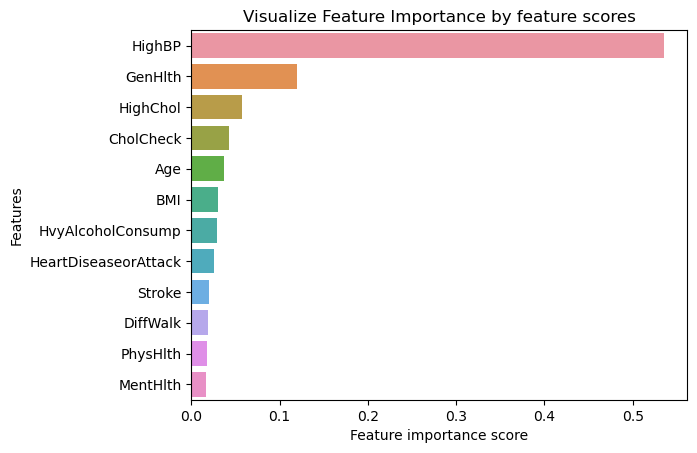

In [156]:
# Define hyperparameter tuning - XGBClassifier for balanced dataset
# ****** please note it is taking 75 seconds to run this cell **********
xgb_bal = XGBClassifier()

param_dist = {
    'n_estimators': [10, 20, 50],  # Number of trees
 #   'learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'max_depth':[10, 20, 30, 40]  # Maximum depth of the tree
}

xgb_random_bal = RandomizedSearchCV(xgb_bal, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

diabetes_prediction(xgb_random_bal,X_train_bal, X_test_bal, y_train_bal, y_test_bal, "features_grid")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Algorithm: RandomForestClassifier
Time took for training: 48.41679525375366

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      9729
           1       1.00      0.00      0.00      1174
           2       0.66      0.75      0.70      8629

    accuracy                           0.70     19532
   macro avg       0.80      0.50      0.48     19532
weighted avg       0.72      0.70      0.68     19532

Accuracy Score: 0.6969588367806676
Balanced Accuracy Score: 0.4952251242075098
Area under curve: 0.7355431753292669 



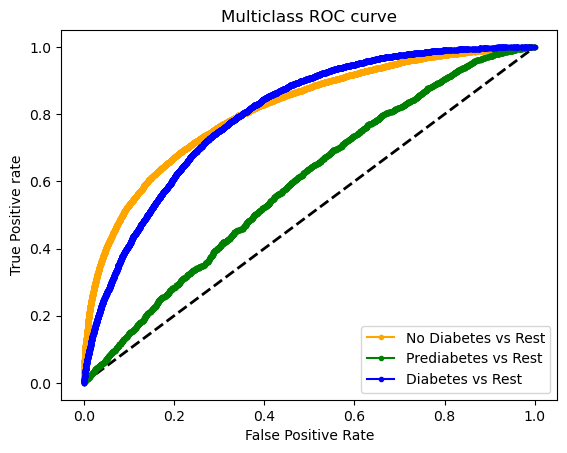

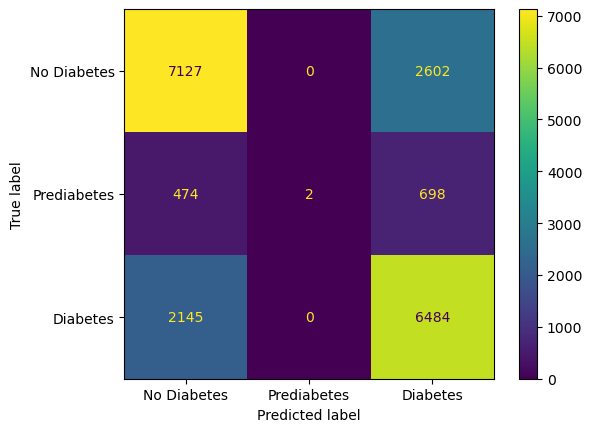

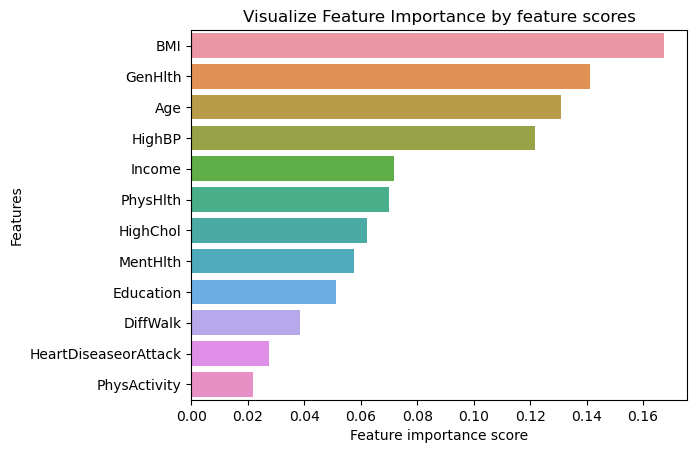

In [157]:
# Define hyperparameter tuning - RandomForestClassifier for balanced dataset
# ****** please note it is taking 48 seconds to run this cell **********

rfc_bal = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Adjust the number of trees in the forest
    'max_depth': [15, 20, 30, 40]  # Adjust the maximum depth of each tree
}

# Create a Grid Search CV object
RF_grid_bal = GridSearchCV(rfc_bal, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
diabetes_prediction(RF_grid_bal,X_train_bal, X_test_bal, y_train_bal, y_test_bal, "features_grid")

In [158]:
#putting all the model names, model classes and the used columns in a dictionary for the balanced dataset 


models = {'LogisticGridCV (bal)': [logistic_grid_bal, bcols],
          'DTGridCV (bal)': [dt_grid_bal, bcols],
          'XGBRandomCV (bal)': [xgb_random_bal, bcols],
          'RFGridCV (bal)': [RF_grid_bal, bcols]
         }

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


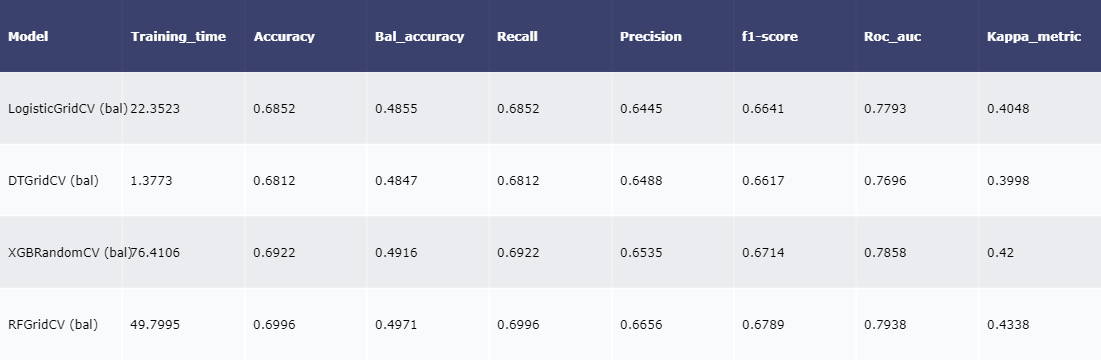

In [159]:
#outputs for all models over the training dataset
# ****** please note it is taking 155 seconds to run this cell **********

model_performances_train = pd.DataFrame() 
substr = 'bal'
for name in models:
       if substr in name:
            model_performances_train = pd.concat([model_performances_train, (model_report(models[name][0], X_train_bal[models[name][1]], 
                                                                                X_test_bal[models[name][1]], 
                                                                                y_train_bal, y_test_bal, name))])
       else:
            model_performances_train = pd.concat([model_performances_train, (model_report(models[name][0], X_train[models[name][1]], 
                                                                                X_test[models[name][1]], 
                                                                                y_train, y_test, name))])
table_train = ff.create_table(np.round(model_performances_train, 4))
py.iplot(table_train)

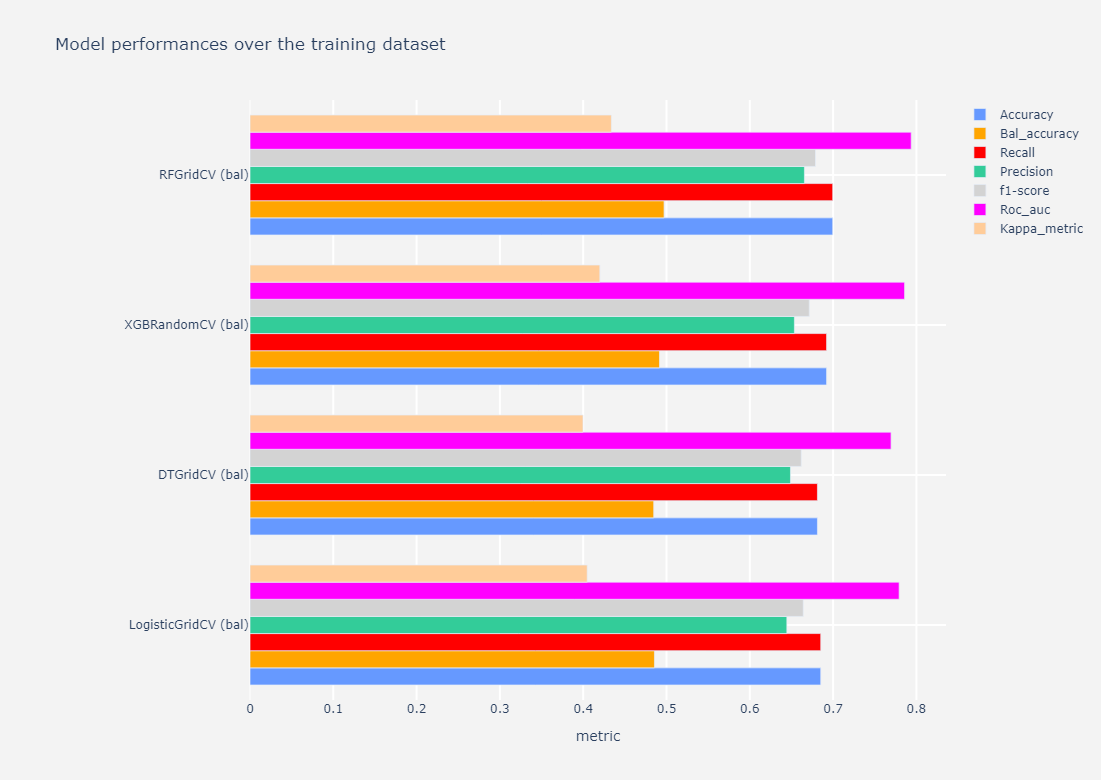

In [160]:
modelmetricsplot(df=model_performances_train, title="Model performances over the training dataset")

#### 3.2.1 Hyperparameter tuning results

After performing Hyperparameter tuning for LogisticRegression, DecisionTreeClassifier, XGBClassifier and RandomForestClassifier algorithms, we can observe overall model performance when compared to the model performances before hyperparameter tuning. 
RandomForestClassifier and XGBClassifier performed better compared to all other two models. 

RandomForestClassifer with tuning improved - 

Accuracy increased from 70% to 71%

Balanced accuracy increased from 49.839% to 49.953%

AUC-ROC score increased slightly from 0.733 to 0.7422

Recall weughted average increased from 70% to 71%

Overall F1 score decreased slightly from 68% to 69%


## Next Steps - Continue tuning the models - Leverage SMOTEENN technique for balancing the data and build Nural Networks model


### 3.3Create XGBClassifier and RandomForestClassifer models using SMOTEENN balanced dataset 
#### SMOTEENN - SMOTE with Edited Nearest Neighbor (ENN) using Python to balance your dataset
